# House Price Prediction

In [23]:
#Import necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

warnings.filterwarnings("ignore")

# Preprossing of data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
numerical_features   = list()
categorical_features = list()
for elm in data.columns:
    if data[elm].dtype == 'object':
        print(elm," ",data[elm].unique())
        categorical_features.append(elm)
    else:
        numerical_features.append(elm)
        pass
    pass
pass

MSZoning   ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street   ['Pave' 'Grvl']
Alley   [nan 'Grvl' 'Pave']
LotShape   ['Reg' 'IR1' 'IR2' 'IR3']
LandContour   ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities   ['AllPub' 'NoSeWa']
LotConfig   ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope   ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1   ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2   ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType   ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle   ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle   ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl   ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

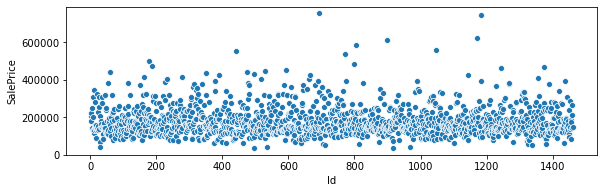

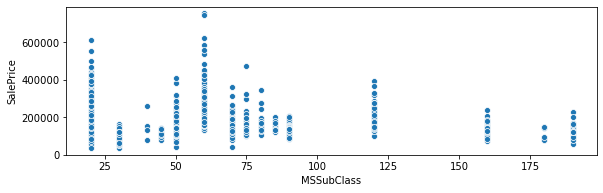

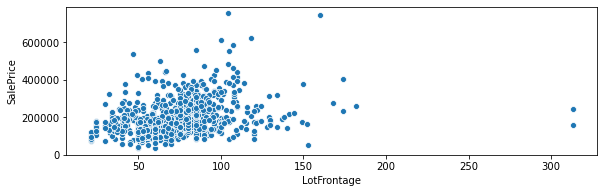

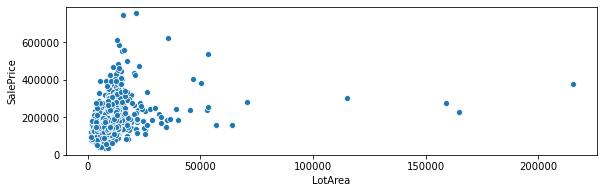

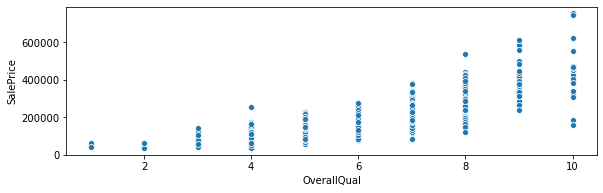

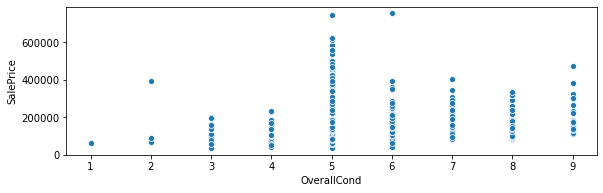

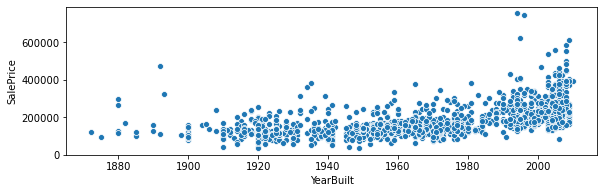

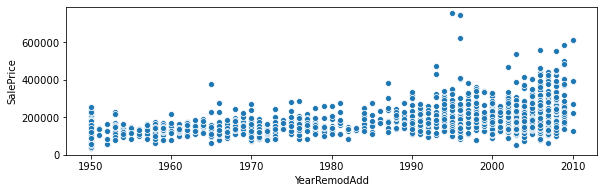

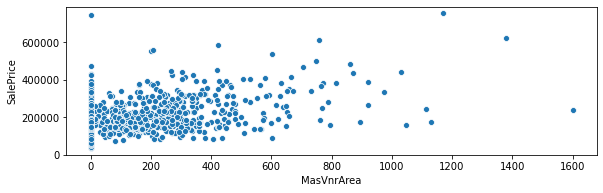

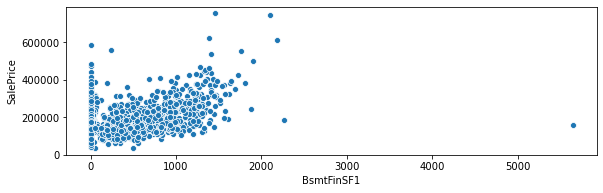

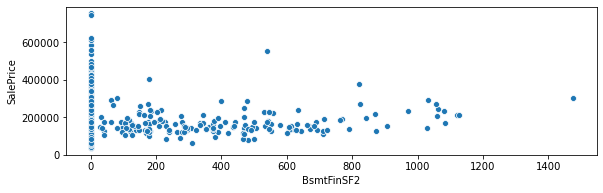

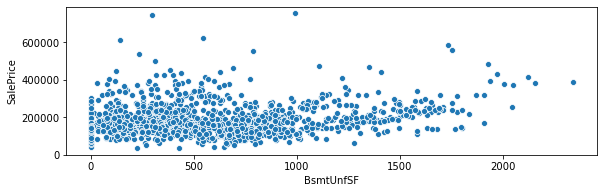

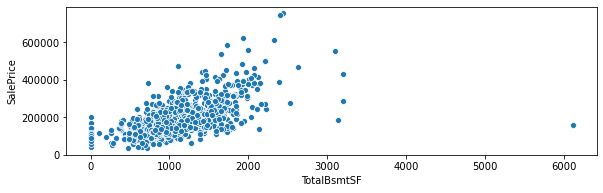

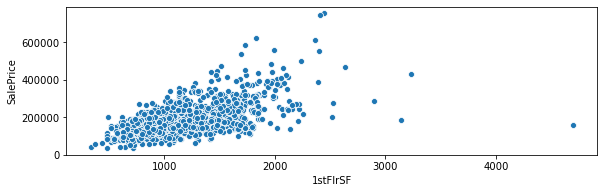

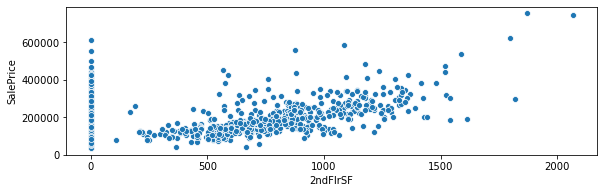

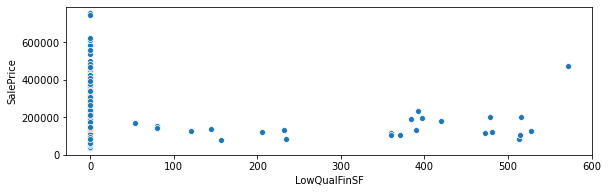

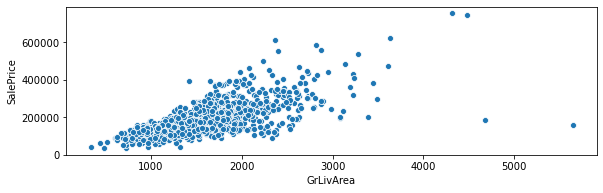

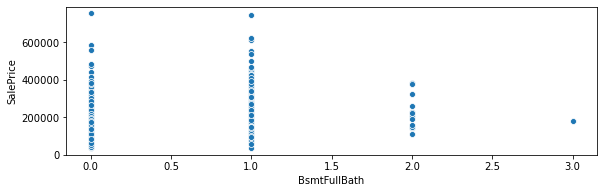

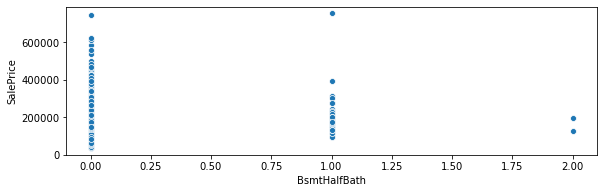

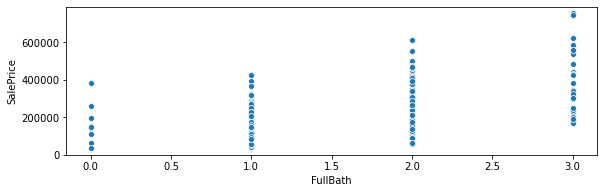

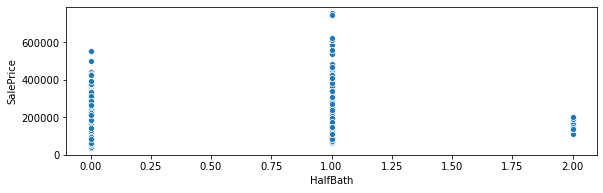

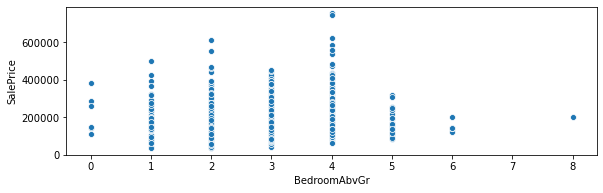

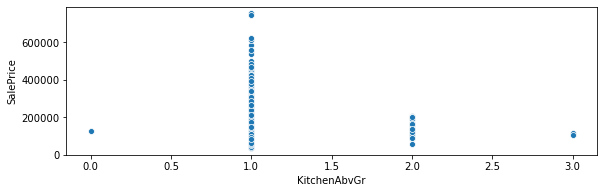

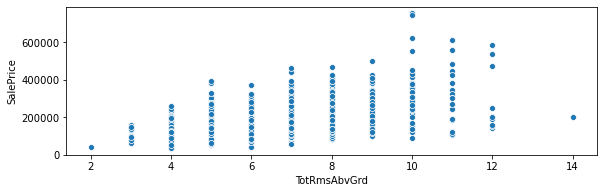

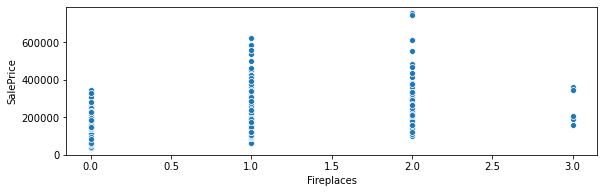

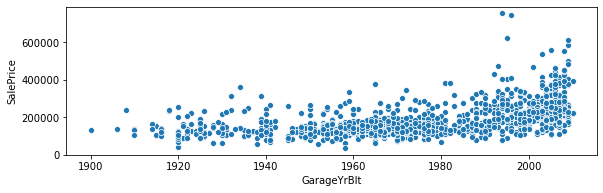

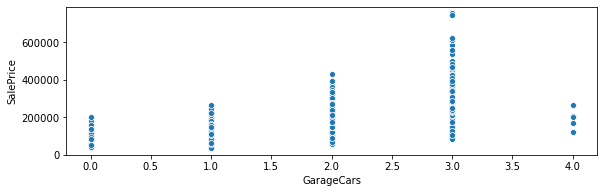

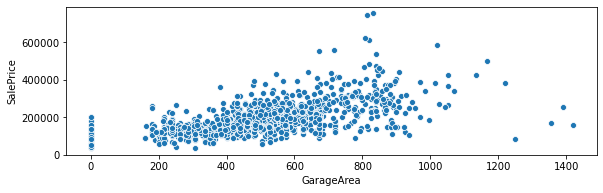

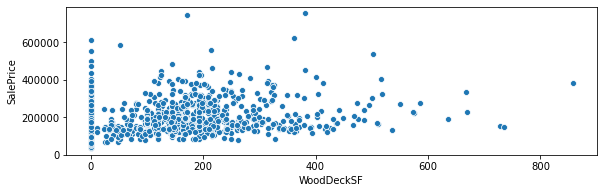

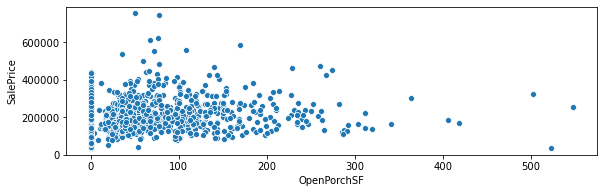

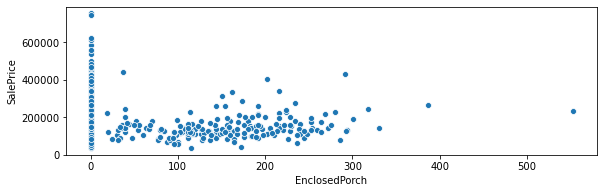

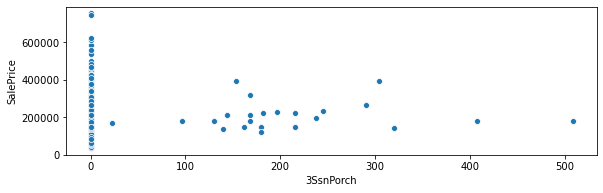

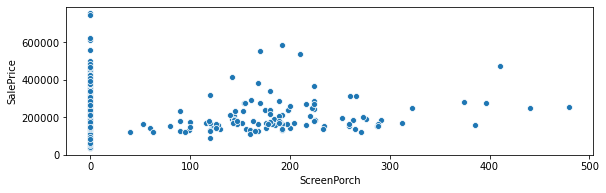

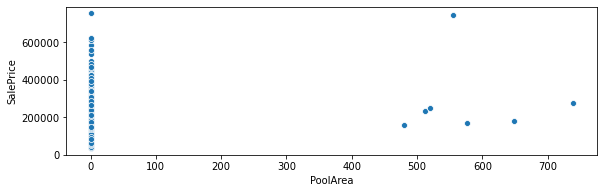

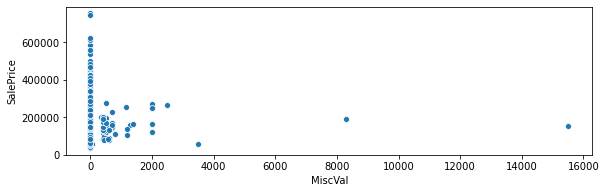

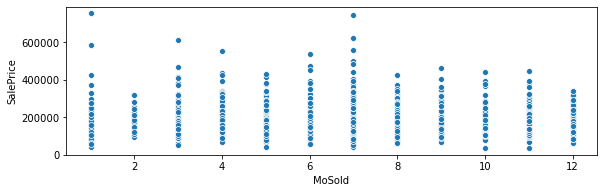

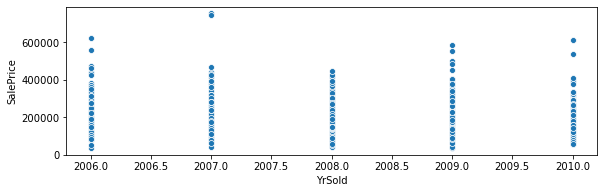

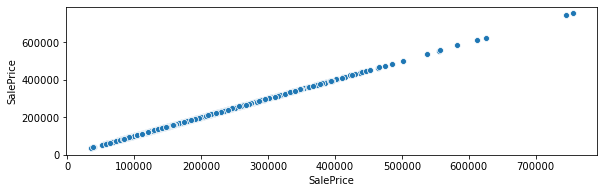

In [4]:
for elm in numerical_features:
    fig = plt.figure(figsize=(16,5))
    fig.add_subplot(2,2,1)
    sns.scatterplot(data[elm], data['SalePrice'])
    plt.tight_layout()
    pass
pass

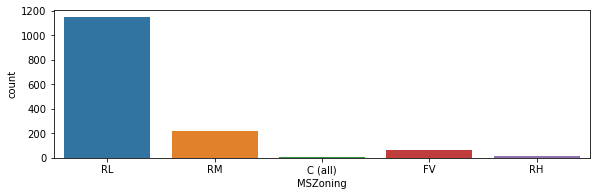

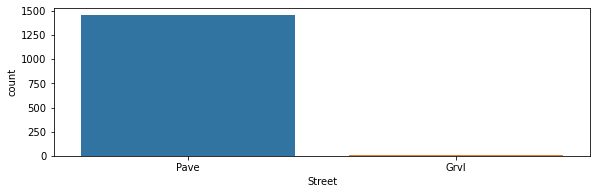

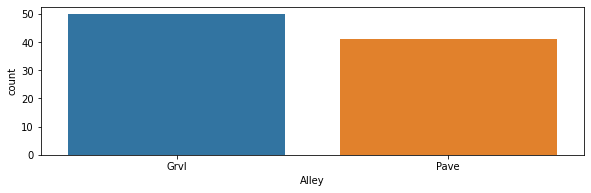

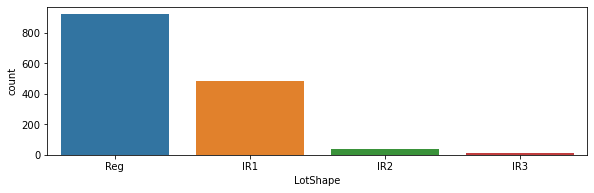

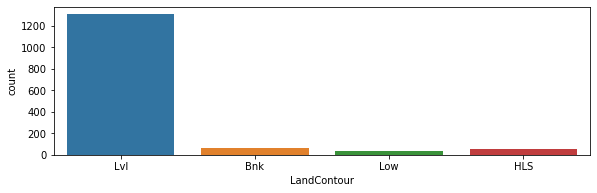

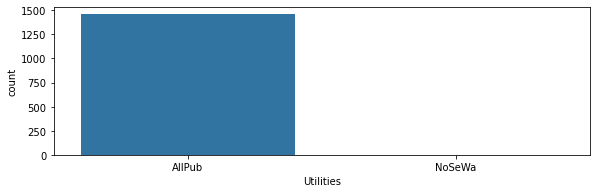

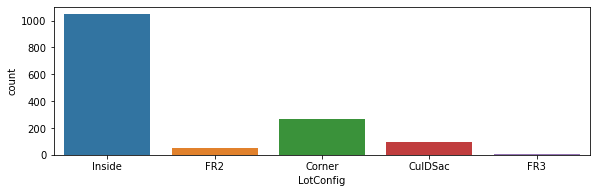

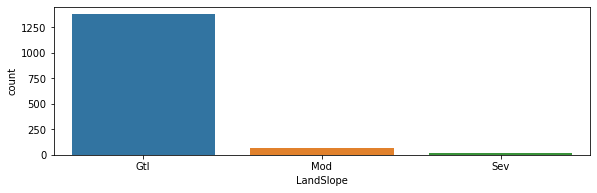

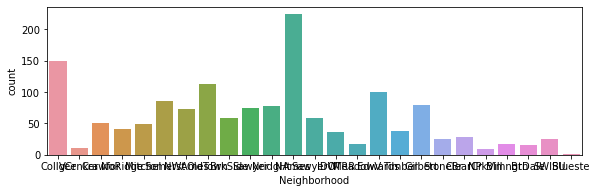

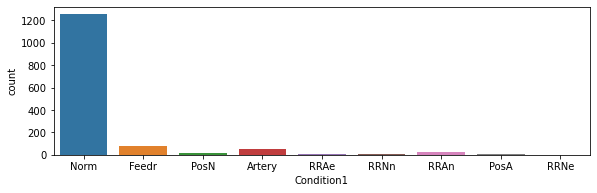

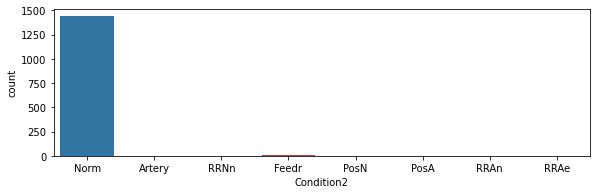

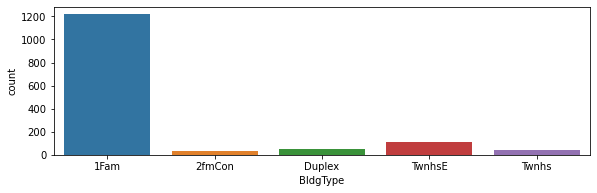

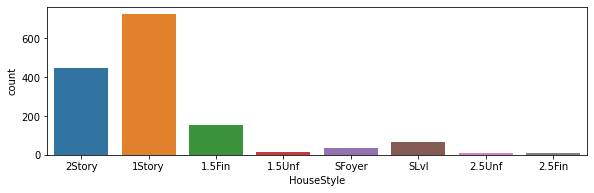

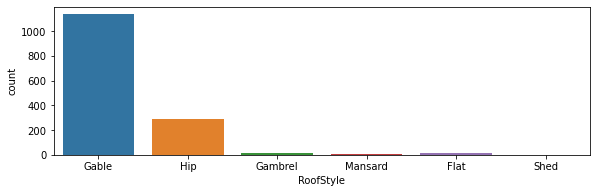

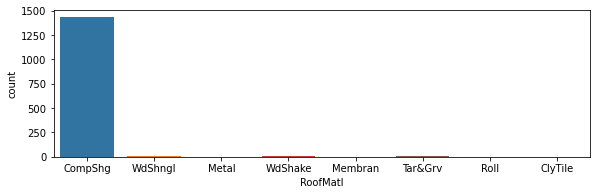

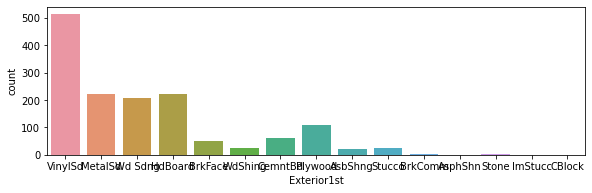

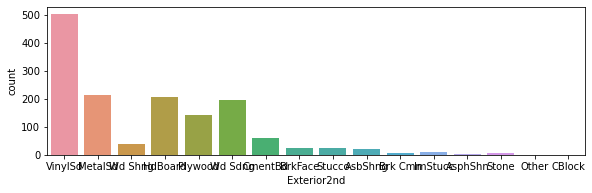

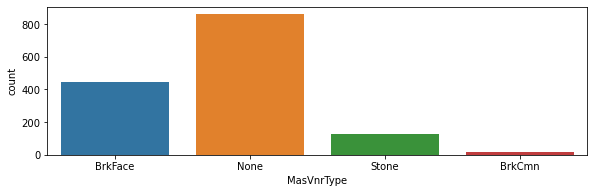

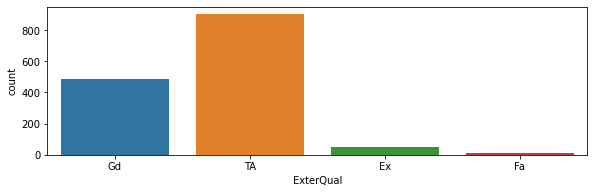

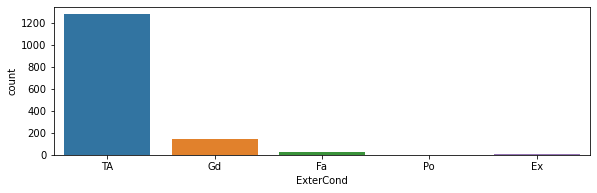

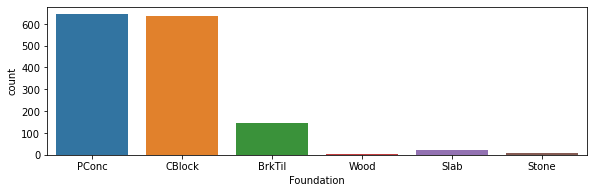

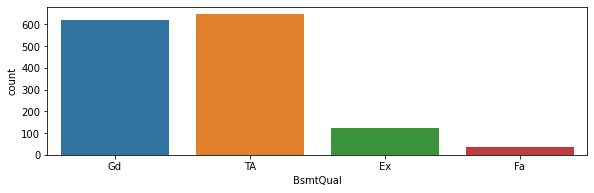

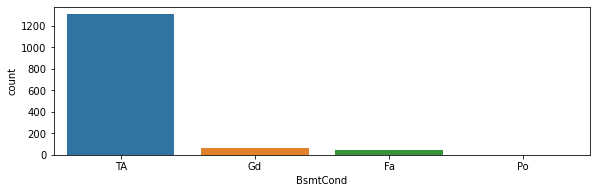

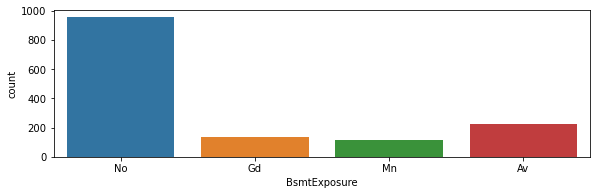

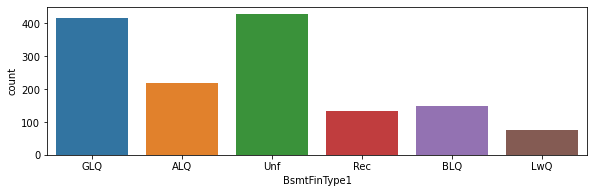

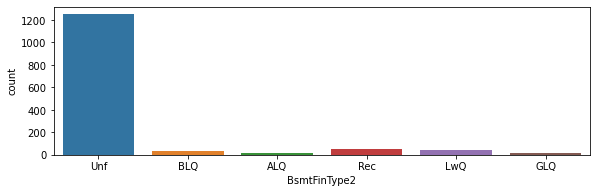

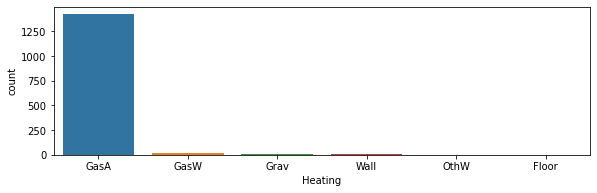

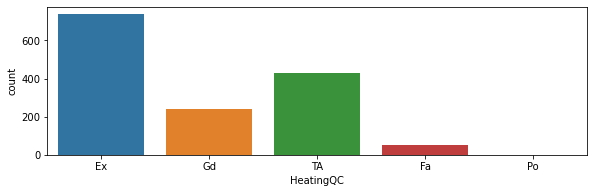

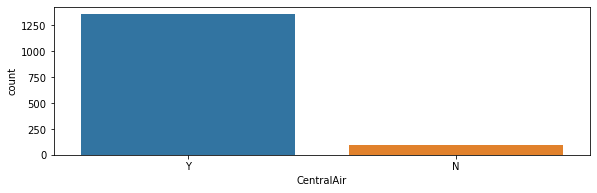

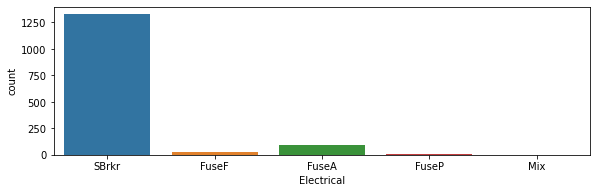

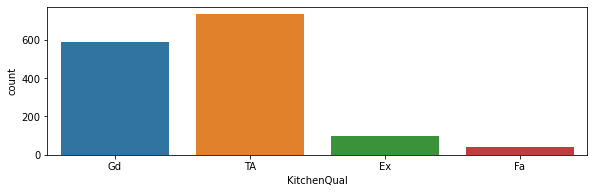

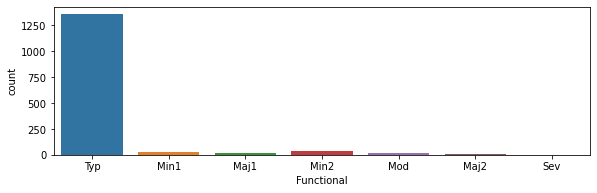

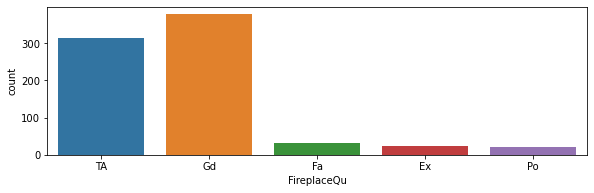

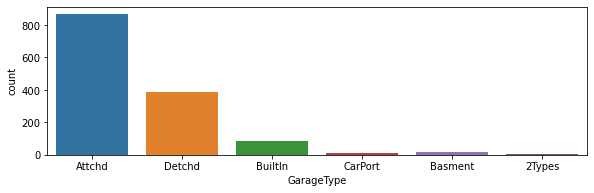

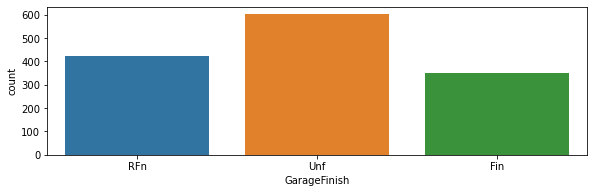

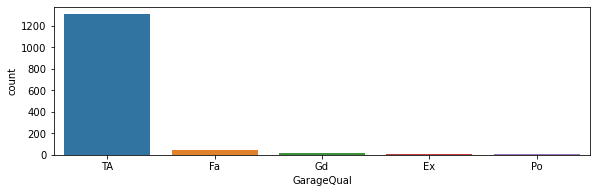

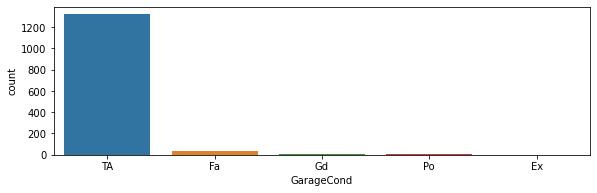

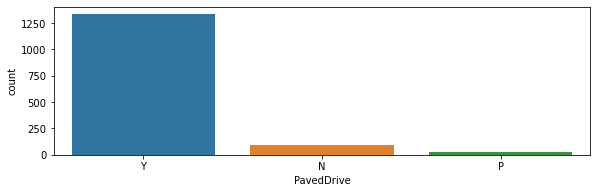

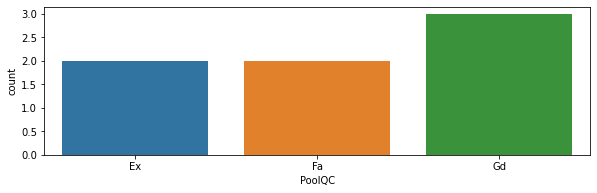

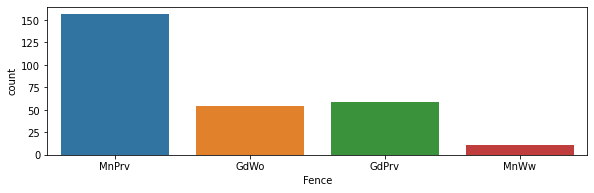

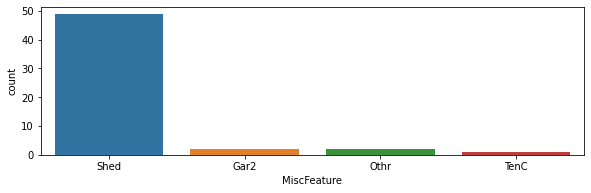

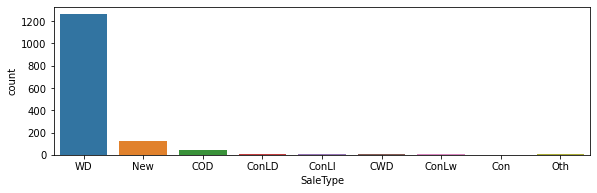

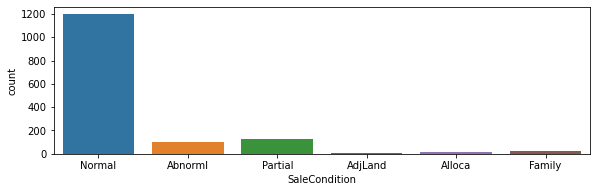

In [5]:
for elm in categorical_features:
    fig = plt.figure(figsize=(16,5))
    fig.add_subplot(2,2,1)
    sns.countplot(data[elm])
    plt.tight_layout()
    pass
pass

In [6]:
features = ['LotArea', 'YearBuilt', 'YearRemodAdd'
           , 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

In [7]:
from scipy import stats
outliers_values = list()
for elm in features:
    z = np.abs(stats.zscore(data[elm]))
    threshold = 3
    l = list(np.where(z > 3))
    print(l)
    pass
pass

[array([  53,  249,  313,  335,  384,  451,  457,  661,  706,  769,  848,
       1298, 1396], dtype=int64)]
[array([ 304,  630,  747, 1132, 1137, 1349], dtype=int64)]
[array([], dtype=int64)]
[array([ 137,  224,  278,  477,  496,  581,  678,  774,  798,  932, 1267],
      dtype=int64)]
[array([ 224,  332,  440,  496,  523,  691, 1044, 1182, 1298, 1373],
      dtype=int64)]
[array([ 224,  440,  496,  523,  529,  691,  898, 1024, 1044, 1182, 1298,
       1373], dtype=int64)]
[array([ 304,  691, 1169, 1182], dtype=int64)]
[array([  51,   88,  125,  170,  185,  197,  198,  263,  267,  406,  589,
        635,  729,  873,  883, 1009, 1031, 1173, 1349, 1440], dtype=int64)]
[array([ 118,  185,  197,  304,  496,  523,  608,  635,  691,  769,  798,
       1169, 1182, 1268, 1298, 1353], dtype=int64)]


In [8]:
values = [53,  249,  313,  335,  384,  451,  457,  661,  706,  769,  848,
       1298, 1396, 304,  630,  747, 1132, 1137, 1349, 137,  224,  278,  477,  496,  581,  678,  774,  798,  932, 1267
         , 224,  332,  440,  496,  523,  691, 1044, 1182, 1298, 1373, 224,  440,  496,  523,  529,  691,  898, 1024, 1044, 1182, 1298,
       1373, 304,  691, 1169, 1182,1,   88,  125,  170,  185,  197,  198,  263,  267,  406,  589,
        635,  729,  873,  883, 1009, 1031, 1173, 1349, 1440, 118,  185,  197,  304,  496,  523,  608,  635,  691,  769,  798,
       1169, 1182, 1268, 1298, 1353 ]

In [9]:
outlier_values = list(set(values))

In [10]:
data1 = data.drop(index = outlier_values)

In [11]:
print("the new shape of data", data1.shape)

the new shape of data (1396, 81)


In [12]:
X = data1[features]
y = data1['SalePrice']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Regression using numerical values 

# Linear Regression model

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [15]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [16]:
print(Linear_Regression.intercept_)
print(Linear_Regression.coef_)

175769.987888993
[ 5.37605131e+03  1.64730089e+04  1.23213626e+04 -8.35908140e+03
  2.21145848e+04 -1.13047309e+18 -1.39857849e+18 -1.41235403e+16
  1.51755965e+18]


In [17]:
y_pred = Linear_Regression.predict(X_test)

coeff_df = pd.DataFrame({"features" : features, "Coefficient" : Linear_Regression.coef_ }) 
coeff_df

,features,Coefficient
0,LotArea,5.376051e+03
1,YearBuilt,1.647301e+04
2,YearRemodAdd,1.232136e+04
3,BsmtUnfSF,-8.359081e+03
4,TotalBsmtSF,2.211458e+04
5,1stFlrSF,-1.130473e+18
6,2ndFlrSF,-1.398578e+18
7,LowQualFinSF,-1.412354e+16
8,GrLivArea,1.517560e+18


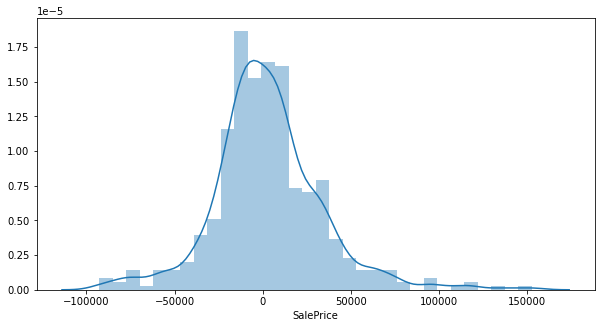

In [18]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 22437.80495613243
MSE: 995251257.7861993
RMSE: 31547.603043435793
VarScore: 0.798465133051714


# Keras Sequential model 

In [40]:
model = Sequential()
model.add(Dense(200,  activation='relu'))
model.add(Dense(200,  activation='relu'))
model.add(Dense(200,  activation='relu'))
model.add(Dense(200,  activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam',loss='mean_squared_error')

In [41]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=200,epochs=5000)
model.summary()

Epoch 1/5000
5/5 [==============================] - 0s 40ms/step - loss: 35260985344.0000 - val_loss: 34283812864.0000
Epoch 2/5000
5/5 [==============================] - 0s 9ms/step - loss: 30876213248.0000 - val_loss: 23406510080.0000
Epoch 3/5000
5/5 [==============================] - 0s 9ms/step - loss: 14073417728.0000 - val_loss: 7858077696.0000
Epoch 4/5000
5/5 [==============================] - 0s 9ms/step - loss: 9820119040.0000 - val_loss: 5110843392.0000
Epoch 5/5000
5/5 [==============================] - 0s 9ms/step - loss: 6565392384.0000 - val_loss: 8715334656.0000
Epoch 6/5000
5/5 [==============================] - 0s 9ms/step - loss: 7022069760.0000 - val_loss: 4568446976.0000
Epoch 7/5000
5/5 [==============================] - 0s 8ms/step - loss: 5147357184.0000 - val_loss: 4846373888.0000
Epoch 8/5000
5/5 [==============================] - 0s 8ms/step - loss: 4406551552.0000 - val_loss: 4312475136.0000
Epoch 9/5000
5/5 [==============================] - 0s 8ms/step - 

5/5 [==============================] - 0s 8ms/step - loss: 1644416128.0000 - val_loss: 1424118656.0000
Epoch 72/5000
5/5 [==============================] - 0s 9ms/step - loss: 1675082496.0000 - val_loss: 1494759936.0000
Epoch 73/5000
5/5 [==============================] - 0s 9ms/step - loss: 1635210496.0000 - val_loss: 1706753664.0000
Epoch 74/5000
5/5 [==============================] - 0s 9ms/step - loss: 1643244928.0000 - val_loss: 1428830336.0000
Epoch 75/5000
5/5 [==============================] - 0s 9ms/step - loss: 1578177920.0000 - val_loss: 1419086976.0000
Epoch 76/5000
5/5 [==============================] - 0s 8ms/step - loss: 1546571136.0000 - val_loss: 1481127936.0000
Epoch 77/5000
5/5 [==============================] - 0s 9ms/step - loss: 1536601344.0000 - val_loss: 1412818304.0000
Epoch 78/5000
5/5 [==============================] - 0s 9ms/step - loss: 1533385344.0000 - val_loss: 1412553472.0000
Epoch 79/5000
5/5 [==============================] - 0s 12ms/step - loss: 1594

Epoch 141/5000
5/5 [==============================] - 0s 8ms/step - loss: 1397818240.0000 - val_loss: 1323555072.0000
Epoch 142/5000
5/5 [==============================] - 0s 8ms/step - loss: 1474075904.0000 - val_loss: 1324512000.0000
Epoch 143/5000
5/5 [==============================] - 0s 8ms/step - loss: 1464810624.0000 - val_loss: 1417424896.0000
Epoch 144/5000
5/5 [==============================] - 0s 8ms/step - loss: 1397670400.0000 - val_loss: 1474097152.0000
Epoch 145/5000
5/5 [==============================] - 0s 8ms/step - loss: 1438189184.0000 - val_loss: 1303065216.0000
Epoch 146/5000
5/5 [==============================] - 0s 8ms/step - loss: 1385612032.0000 - val_loss: 1311551104.0000
Epoch 147/5000
5/5 [==============================] - 0s 8ms/step - loss: 1392152576.0000 - val_loss: 1352195712.0000
Epoch 148/5000
5/5 [==============================] - 0s 8ms/step - loss: 1461814784.0000 - val_loss: 1515686656.0000
Epoch 149/5000
5/5 [==============================] - 0s

5/5 [==============================] - 0s 8ms/step - loss: 1266709888.0000 - val_loss: 1357108736.0000
Epoch 211/5000
5/5 [==============================] - 0s 8ms/step - loss: 1282680704.0000 - val_loss: 1349374976.0000
Epoch 212/5000
5/5 [==============================] - 0s 9ms/step - loss: 1263894912.0000 - val_loss: 1455079552.0000
Epoch 213/5000
5/5 [==============================] - 0s 8ms/step - loss: 1339582464.0000 - val_loss: 1336528768.0000
Epoch 214/5000
5/5 [==============================] - 0s 8ms/step - loss: 1320339200.0000 - val_loss: 1468444416.0000
Epoch 215/5000
5/5 [==============================] - 0s 8ms/step - loss: 1358905472.0000 - val_loss: 1292778368.0000
Epoch 216/5000
5/5 [==============================] - 0s 8ms/step - loss: 1278613888.0000 - val_loss: 1285884928.0000
Epoch 217/5000
5/5 [==============================] - 0s 8ms/step - loss: 1261704064.0000 - val_loss: 1477326592.0000
Epoch 218/5000
5/5 [==============================] - 0s 8ms/step - los

5/5 [==============================] - 0s 9ms/step - loss: 1174916992.0000 - val_loss: 1623586304.0000
Epoch 280/5000
5/5 [==============================] - 0s 9ms/step - loss: 1261710464.0000 - val_loss: 1329831040.0000
Epoch 281/5000
5/5 [==============================] - 0s 9ms/step - loss: 1358978944.0000 - val_loss: 1550932992.0000
Epoch 282/5000
5/5 [==============================] - 0s 9ms/step - loss: 1272050304.0000 - val_loss: 1302995584.0000
Epoch 283/5000
5/5 [==============================] - 0s 8ms/step - loss: 1201720832.0000 - val_loss: 1477689344.0000
Epoch 284/5000
5/5 [==============================] - 0s 9ms/step - loss: 1230131840.0000 - val_loss: 1354529920.0000
Epoch 285/5000
5/5 [==============================] - 0s 8ms/step - loss: 1174360704.0000 - val_loss: 1334068992.0000
Epoch 286/5000
5/5 [==============================] - 0s 8ms/step - loss: 1187255040.0000 - val_loss: 1355111296.0000
Epoch 287/5000
5/5 [==============================] - 0s 9ms/step - los

5/5 [==============================] - 0s 8ms/step - loss: 1090670208.0000 - val_loss: 1470477312.0000
Epoch 349/5000
5/5 [==============================] - 0s 8ms/step - loss: 1146270720.0000 - val_loss: 1462308608.0000
Epoch 350/5000
5/5 [==============================] - 0s 8ms/step - loss: 1181812096.0000 - val_loss: 1386024832.0000
Epoch 351/5000
5/5 [==============================] - 0s 9ms/step - loss: 1098787712.0000 - val_loss: 1525833472.0000
Epoch 352/5000
5/5 [==============================] - 0s 8ms/step - loss: 1236782208.0000 - val_loss: 1419151360.0000
Epoch 353/5000
5/5 [==============================] - 0s 8ms/step - loss: 1227242368.0000 - val_loss: 1386831872.0000
Epoch 354/5000
5/5 [==============================] - 0s 9ms/step - loss: 1316108416.0000 - val_loss: 1511063936.0000
Epoch 355/5000
5/5 [==============================] - 0s 8ms/step - loss: 1185895296.0000 - val_loss: 1559492096.0000
Epoch 356/5000
5/5 [==============================] - 0s 8ms/step - los

5/5 [==============================] - 0s 10ms/step - loss: 1048003520.0000 - val_loss: 1412493184.0000
Epoch 418/5000
5/5 [==============================] - 0s 10ms/step - loss: 1077212928.0000 - val_loss: 1536773760.0000
Epoch 419/5000
5/5 [==============================] - 0s 9ms/step - loss: 1094235648.0000 - val_loss: 1369824768.0000
Epoch 420/5000
5/5 [==============================] - 0s 11ms/step - loss: 1184369152.0000 - val_loss: 1427631104.0000
Epoch 421/5000
5/5 [==============================] - 0s 10ms/step - loss: 1166236928.0000 - val_loss: 1549540992.0000
Epoch 422/5000
5/5 [==============================] - 0s 10ms/step - loss: 1106404736.0000 - val_loss: 1488781696.0000
Epoch 423/5000
5/5 [==============================] - 0s 8ms/step - loss: 1055387392.0000 - val_loss: 1401267584.0000
Epoch 424/5000
5/5 [==============================] - 0s 9ms/step - loss: 1080014720.0000 - val_loss: 1430560512.0000
Epoch 425/5000
5/5 [==============================] - 0s 9ms/step 

5/5 [==============================] - 0s 10ms/step - loss: 1013636608.0000 - val_loss: 1448603520.0000
Epoch 487/5000
5/5 [==============================] - 0s 12ms/step - loss: 1038125568.0000 - val_loss: 1389894144.0000
Epoch 488/5000
5/5 [==============================] - 0s 10ms/step - loss: 1033187520.0000 - val_loss: 1438648832.0000
Epoch 489/5000
5/5 [==============================] - 0s 10ms/step - loss: 1036404160.0000 - val_loss: 1652050688.0000
Epoch 490/5000
5/5 [==============================] - 0s 10ms/step - loss: 1155225600.0000 - val_loss: 1416604544.0000
Epoch 491/5000
5/5 [==============================] - 0s 10ms/step - loss: 1000047808.0000 - val_loss: 1465104256.0000
Epoch 492/5000
5/5 [==============================] - 0s 10ms/step - loss: 1033290624.0000 - val_loss: 1443896960.0000
Epoch 493/5000
5/5 [==============================] - 0s 10ms/step - loss: 1074857600.0000 - val_loss: 1599825792.0000
Epoch 494/5000
5/5 [==============================] - 0s 11ms/s

5/5 [==============================] - 0s 9ms/step - loss: 1017579648.0000 - val_loss: 1597794688.0000
Epoch 556/5000
5/5 [==============================] - 0s 10ms/step - loss: 1072769728.0000 - val_loss: 1503196544.0000
Epoch 557/5000
5/5 [==============================] - 0s 9ms/step - loss: 1002957952.0000 - val_loss: 1482737664.0000
Epoch 558/5000
5/5 [==============================] - 0s 9ms/step - loss: 992546240.0000 - val_loss: 1461485824.0000
Epoch 559/5000
5/5 [==============================] - 0s 9ms/step - loss: 943516544.0000 - val_loss: 1479054720.0000
Epoch 560/5000
5/5 [==============================] - 0s 10ms/step - loss: 1016559232.0000 - val_loss: 1514410880.0000
Epoch 561/5000
5/5 [==============================] - 0s 8ms/step - loss: 968328960.0000 - val_loss: 1468508800.0000
Epoch 562/5000
5/5 [==============================] - 0s 12ms/step - loss: 977269632.0000 - val_loss: 1466052224.0000
Epoch 563/5000
5/5 [==============================] - 0s 10ms/step - los

5/5 [==============================] - 0s 7ms/step - loss: 905104320.0000 - val_loss: 1683837824.0000
Epoch 625/5000
5/5 [==============================] - 0s 6ms/step - loss: 975483648.0000 - val_loss: 1488299520.0000
Epoch 626/5000
5/5 [==============================] - 0s 10ms/step - loss: 920099072.0000 - val_loss: 1521649152.0000
Epoch 627/5000
5/5 [==============================] - 0s 10ms/step - loss: 940605696.0000 - val_loss: 1641606272.0000
Epoch 628/5000
5/5 [==============================] - 0s 10ms/step - loss: 918653184.0000 - val_loss: 1529418240.0000
Epoch 629/5000
5/5 [==============================] - 0s 9ms/step - loss: 938895552.0000 - val_loss: 1545780096.0000
Epoch 630/5000
5/5 [==============================] - 0s 9ms/step - loss: 921225536.0000 - val_loss: 1561210368.0000
Epoch 631/5000
5/5 [==============================] - 0s 9ms/step - loss: 945097536.0000 - val_loss: 1512509696.0000
Epoch 632/5000
5/5 [==============================] - 0s 9ms/step - loss: 90

Epoch 694/5000
5/5 [==============================] - 0s 9ms/step - loss: 842882112.0000 - val_loss: 1557834624.0000
Epoch 695/5000
5/5 [==============================] - 0s 9ms/step - loss: 867393024.0000 - val_loss: 1653902336.0000
Epoch 696/5000
5/5 [==============================] - 0s 9ms/step - loss: 854948736.0000 - val_loss: 1578700160.0000
Epoch 697/5000
5/5 [==============================] - 0s 10ms/step - loss: 872596352.0000 - val_loss: 1572209152.0000
Epoch 698/5000
5/5 [==============================] - 0s 10ms/step - loss: 861044096.0000 - val_loss: 1562092416.0000
Epoch 699/5000
5/5 [==============================] - 0s 9ms/step - loss: 827284480.0000 - val_loss: 1613807104.0000
Epoch 700/5000
5/5 [==============================] - 0s 10ms/step - loss: 824685888.0000 - val_loss: 1612551296.0000
Epoch 701/5000
5/5 [==============================] - 0s 9ms/step - loss: 840105920.0000 - val_loss: 1612092800.0000
Epoch 702/5000
5/5 [==============================] - 0s 9ms/

Epoch 764/5000
5/5 [==============================] - 0s 9ms/step - loss: 788220096.0000 - val_loss: 1620838784.0000
Epoch 765/5000
5/5 [==============================] - 0s 9ms/step - loss: 853583488.0000 - val_loss: 1673382272.0000
Epoch 766/5000
5/5 [==============================] - 0s 9ms/step - loss: 771123904.0000 - val_loss: 1647256704.0000
Epoch 767/5000
5/5 [==============================] - 0s 9ms/step - loss: 766855872.0000 - val_loss: 1639967232.0000
Epoch 768/5000
5/5 [==============================] - 0s 9ms/step - loss: 757266048.0000 - val_loss: 1716130432.0000
Epoch 769/5000
5/5 [==============================] - 0s 9ms/step - loss: 807732544.0000 - val_loss: 1818022912.0000
Epoch 770/5000
5/5 [==============================] - 0s 9ms/step - loss: 869078208.0000 - val_loss: 1679202304.0000
Epoch 771/5000
5/5 [==============================] - 0s 9ms/step - loss: 831595776.0000 - val_loss: 1685071616.0000
Epoch 772/5000
5/5 [==============================] - 0s 9ms/ste

Epoch 834/5000
5/5 [==============================] - 0s 9ms/step - loss: 799034944.0000 - val_loss: 1683422080.0000
Epoch 835/5000
5/5 [==============================] - 0s 9ms/step - loss: 751667648.0000 - val_loss: 1888461824.0000
Epoch 836/5000
5/5 [==============================] - 0s 9ms/step - loss: 796361216.0000 - val_loss: 1680688512.0000
Epoch 837/5000
5/5 [==============================] - 0s 9ms/step - loss: 789679360.0000 - val_loss: 1760854528.0000
Epoch 838/5000
5/5 [==============================] - 0s 10ms/step - loss: 750299584.0000 - val_loss: 1737460608.0000
Epoch 839/5000
5/5 [==============================] - 0s 9ms/step - loss: 692713920.0000 - val_loss: 1759932160.0000
Epoch 840/5000
5/5 [==============================] - 0s 8ms/step - loss: 666262272.0000 - val_loss: 1692805120.0000
Epoch 841/5000
5/5 [==============================] - 0s 10ms/step - loss: 654035840.0000 - val_loss: 1673316864.0000
Epoch 842/5000
5/5 [==============================] - 0s 9ms/s

Epoch 904/5000
5/5 [==============================] - 0s 9ms/step - loss: 656380672.0000 - val_loss: 1799553152.0000
Epoch 905/5000
5/5 [==============================] - 0s 9ms/step - loss: 625985984.0000 - val_loss: 1815820032.0000
Epoch 906/5000
5/5 [==============================] - 0s 9ms/step - loss: 615543552.0000 - val_loss: 1804976768.0000
Epoch 907/5000
5/5 [==============================] - 0s 10ms/step - loss: 635257280.0000 - val_loss: 1849563264.0000
Epoch 908/5000
5/5 [==============================] - 0s 9ms/step - loss: 722485184.0000 - val_loss: 1784924800.0000
Epoch 909/5000
5/5 [==============================] - 0s 9ms/step - loss: 689094016.0000 - val_loss: 1770518784.0000
Epoch 910/5000
5/5 [==============================] - 0s 10ms/step - loss: 653655168.0000 - val_loss: 2003244160.0000
Epoch 911/5000
5/5 [==============================] - 0s 9ms/step - loss: 665073216.0000 - val_loss: 1741142016.0000
Epoch 912/5000
5/5 [==============================] - 0s 10ms/

Epoch 974/5000
5/5 [==============================] - 0s 9ms/step - loss: 582322688.0000 - val_loss: 1906659328.0000
Epoch 975/5000
5/5 [==============================] - 0s 9ms/step - loss: 586060352.0000 - val_loss: 1927483264.0000
Epoch 976/5000
5/5 [==============================] - 0s 9ms/step - loss: 576497088.0000 - val_loss: 1916573312.0000
Epoch 977/5000
5/5 [==============================] - 0s 9ms/step - loss: 576301312.0000 - val_loss: 1923374848.0000
Epoch 978/5000
5/5 [==============================] - 0s 9ms/step - loss: 567848512.0000 - val_loss: 1801716096.0000
Epoch 979/5000
5/5 [==============================] - 0s 9ms/step - loss: 577311360.0000 - val_loss: 2002521344.0000
Epoch 980/5000
5/5 [==============================] - 0s 9ms/step - loss: 571105088.0000 - val_loss: 1854124672.0000
Epoch 981/5000
5/5 [==============================] - 0s 9ms/step - loss: 572525888.0000 - val_loss: 1897949696.0000
Epoch 982/5000
5/5 [==============================] - 0s 9ms/ste

5/5 [==============================] - 0s 9ms/step - loss: 553838656.0000 - val_loss: 1905827456.0000
Epoch 1044/5000
5/5 [==============================] - 0s 10ms/step - loss: 529134496.0000 - val_loss: 1932290688.0000
Epoch 1045/5000
5/5 [==============================] - 0s 9ms/step - loss: 524890592.0000 - val_loss: 1928952320.0000
Epoch 1046/5000
5/5 [==============================] - 0s 9ms/step - loss: 504577728.0000 - val_loss: 1921472640.0000
Epoch 1047/5000
5/5 [==============================] - 0s 9ms/step - loss: 501841760.0000 - val_loss: 2008006784.0000
Epoch 1048/5000
5/5 [==============================] - 0s 9ms/step - loss: 534039712.0000 - val_loss: 1938333568.0000
Epoch 1049/5000
5/5 [==============================] - 0s 9ms/step - loss: 506679808.0000 - val_loss: 2032565888.0000
Epoch 1050/5000
5/5 [==============================] - 0s 10ms/step - loss: 511461216.0000 - val_loss: 1958452480.0000
Epoch 1051/5000
5/5 [==============================] - 0s 10ms/step - 

5/5 [==============================] - 0s 9ms/step - loss: 510146272.0000 - val_loss: 1989203072.0000
Epoch 1113/5000
5/5 [==============================] - 0s 9ms/step - loss: 518108896.0000 - val_loss: 2081879680.0000
Epoch 1114/5000
5/5 [==============================] - 0s 9ms/step - loss: 490122464.0000 - val_loss: 1952807040.0000
Epoch 1115/5000
5/5 [==============================] - 0s 9ms/step - loss: 515655136.0000 - val_loss: 2158676480.0000
Epoch 1116/5000
5/5 [==============================] - 0s 8ms/step - loss: 524169600.0000 - val_loss: 2032321152.0000
Epoch 1117/5000
5/5 [==============================] - 0s 9ms/step - loss: 490623872.0000 - val_loss: 2062799616.0000
Epoch 1118/5000
5/5 [==============================] - 0s 9ms/step - loss: 508182400.0000 - val_loss: 1982150016.0000
Epoch 1119/5000
5/5 [==============================] - 0s 9ms/step - loss: 493869312.0000 - val_loss: 2028607872.0000
Epoch 1120/5000
5/5 [==============================] - 0s 9ms/step - los

5/5 [==============================] - 0s 10ms/step - loss: 489646240.0000 - val_loss: 2303920896.0000
Epoch 1182/5000
5/5 [==============================] - 0s 10ms/step - loss: 482784576.0000 - val_loss: 1996632192.0000
Epoch 1183/5000
5/5 [==============================] - 0s 9ms/step - loss: 480295904.0000 - val_loss: 2107704832.0000
Epoch 1184/5000
5/5 [==============================] - 0s 9ms/step - loss: 467987520.0000 - val_loss: 2146293504.0000
Epoch 1185/5000
5/5 [==============================] - 0s 9ms/step - loss: 480381504.0000 - val_loss: 2111261056.0000
Epoch 1186/5000
5/5 [==============================] - 0s 10ms/step - loss: 513857568.0000 - val_loss: 2083873664.0000
Epoch 1187/5000
5/5 [==============================] - 0s 9ms/step - loss: 446836736.0000 - val_loss: 2127822464.0000
Epoch 1188/5000
5/5 [==============================] - 0s 9ms/step - loss: 443550976.0000 - val_loss: 2131576064.0000
Epoch 1189/5000
5/5 [==============================] - 0s 9ms/step - 

5/5 [==============================] - 0s 9ms/step - loss: 480772224.0000 - val_loss: 2165606656.0000
Epoch 1251/5000
5/5 [==============================] - 0s 9ms/step - loss: 474724224.0000 - val_loss: 2186092800.0000
Epoch 1252/5000
5/5 [==============================] - 0s 9ms/step - loss: 494318496.0000 - val_loss: 2123868288.0000
Epoch 1253/5000
5/5 [==============================] - 0s 9ms/step - loss: 445810912.0000 - val_loss: 2116553472.0000
Epoch 1254/5000
5/5 [==============================] - 0s 9ms/step - loss: 489092864.0000 - val_loss: 2240567040.0000
Epoch 1255/5000
5/5 [==============================] - 0s 9ms/step - loss: 444137952.0000 - val_loss: 2123171072.0000
Epoch 1256/5000
5/5 [==============================] - 0s 9ms/step - loss: 412162784.0000 - val_loss: 2177360640.0000
Epoch 1257/5000
5/5 [==============================] - 0s 9ms/step - loss: 417962144.0000 - val_loss: 2134305024.0000
Epoch 1258/5000
5/5 [==============================] - 0s 9ms/step - los

5/5 [==============================] - 0s 9ms/step - loss: 375602112.0000 - val_loss: 2126861696.0000
Epoch 1320/5000
5/5 [==============================] - 0s 10ms/step - loss: 401975360.0000 - val_loss: 2243972352.0000
Epoch 1321/5000
5/5 [==============================] - 0s 9ms/step - loss: 403271744.0000 - val_loss: 2413430272.0000
Epoch 1322/5000
5/5 [==============================] - 0s 9ms/step - loss: 398245760.0000 - val_loss: 2317444352.0000
Epoch 1323/5000
5/5 [==============================] - 0s 10ms/step - loss: 422981440.0000 - val_loss: 2379191552.0000
Epoch 1324/5000
5/5 [==============================] - 0s 9ms/step - loss: 472729984.0000 - val_loss: 2479837952.0000
Epoch 1325/5000
5/5 [==============================] - 0s 10ms/step - loss: 471039136.0000 - val_loss: 2494687232.0000
Epoch 1326/5000
5/5 [==============================] - 0s 9ms/step - loss: 508074336.0000 - val_loss: 2349704704.0000
Epoch 1327/5000
5/5 [==============================] - 0s 9ms/step - 

5/5 [==============================] - 0s 9ms/step - loss: 496888960.0000 - val_loss: 2476787968.0000
Epoch 1389/5000
5/5 [==============================] - 0s 9ms/step - loss: 482931136.0000 - val_loss: 2664731648.0000
Epoch 1390/5000
5/5 [==============================] - 0s 9ms/step - loss: 595391872.0000 - val_loss: 2373212416.0000
Epoch 1391/5000
5/5 [==============================] - 0s 10ms/step - loss: 540047424.0000 - val_loss: 2461919232.0000
Epoch 1392/5000
5/5 [==============================] - 0s 9ms/step - loss: 483697600.0000 - val_loss: 2356825088.0000
Epoch 1393/5000
5/5 [==============================] - 0s 10ms/step - loss: 495711328.0000 - val_loss: 2435246080.0000
Epoch 1394/5000
5/5 [==============================] - 0s 9ms/step - loss: 477768576.0000 - val_loss: 2432389376.0000
Epoch 1395/5000
5/5 [==============================] - 0s 9ms/step - loss: 468781984.0000 - val_loss: 2403257600.0000
Epoch 1396/5000
5/5 [==============================] - 0s 9ms/step - l

5/5 [==============================] - 0s 9ms/step - loss: 338695136.0000 - val_loss: 2459699712.0000
Epoch 1458/5000
5/5 [==============================] - 0s 10ms/step - loss: 335327584.0000 - val_loss: 2399932416.0000
Epoch 1459/5000
5/5 [==============================] - 0s 9ms/step - loss: 332411552.0000 - val_loss: 2351556096.0000
Epoch 1460/5000
5/5 [==============================] - 0s 9ms/step - loss: 327614592.0000 - val_loss: 2444208128.0000
Epoch 1461/5000
5/5 [==============================] - 0s 9ms/step - loss: 314655200.0000 - val_loss: 2418508288.0000
Epoch 1462/5000
5/5 [==============================] - 0s 10ms/step - loss: 330094816.0000 - val_loss: 2514270208.0000
Epoch 1463/5000
5/5 [==============================] - 0s 9ms/step - loss: 339232288.0000 - val_loss: 2549202432.0000
Epoch 1464/5000
5/5 [==============================] - 0s 9ms/step - loss: 357977792.0000 - val_loss: 2474208512.0000
Epoch 1465/5000
5/5 [==============================] - 0s 9ms/step - l

5/5 [==============================] - 0s 10ms/step - loss: 331175488.0000 - val_loss: 2588995584.0000
Epoch 1527/5000
5/5 [==============================] - 0s 10ms/step - loss: 370980640.0000 - val_loss: 2630777856.0000
Epoch 1528/5000
5/5 [==============================] - 0s 9ms/step - loss: 379678624.0000 - val_loss: 2474849536.0000
Epoch 1529/5000
5/5 [==============================] - 0s 9ms/step - loss: 489013696.0000 - val_loss: 2676042240.0000
Epoch 1530/5000
5/5 [==============================] - 0s 9ms/step - loss: 463121408.0000 - val_loss: 2590492416.0000
Epoch 1531/5000
5/5 [==============================] - 0s 9ms/step - loss: 392779552.0000 - val_loss: 2591753216.0000
Epoch 1532/5000
5/5 [==============================] - 0s 9ms/step - loss: 371716512.0000 - val_loss: 2504646912.0000
Epoch 1533/5000
5/5 [==============================] - 0s 9ms/step - loss: 330304096.0000 - val_loss: 2496574720.0000
Epoch 1534/5000
5/5 [==============================] - 0s 9ms/step - l

5/5 [==============================] - 0s 10ms/step - loss: 296319424.0000 - val_loss: 2573045504.0000
Epoch 1596/5000
5/5 [==============================] - 0s 9ms/step - loss: 372341088.0000 - val_loss: 2538826496.0000
Epoch 1597/5000
5/5 [==============================] - 0s 10ms/step - loss: 309485344.0000 - val_loss: 2619709952.0000
Epoch 1598/5000
5/5 [==============================] - 0s 9ms/step - loss: 338575264.0000 - val_loss: 2650180864.0000
Epoch 1599/5000
5/5 [==============================] - 0s 9ms/step - loss: 348365536.0000 - val_loss: 2762227712.0000
Epoch 1600/5000
5/5 [==============================] - 0s 10ms/step - loss: 335869856.0000 - val_loss: 2539391232.0000
Epoch 1601/5000
5/5 [==============================] - 0s 9ms/step - loss: 312167936.0000 - val_loss: 2686177024.0000
Epoch 1602/5000
5/5 [==============================] - 0s 9ms/step - loss: 322126624.0000 - val_loss: 2444068096.0000
Epoch 1603/5000
5/5 [==============================] - 0s 9ms/step - 

5/5 [==============================] - 0s 9ms/step - loss: 281350240.0000 - val_loss: 2512549632.0000
Epoch 1665/5000
5/5 [==============================] - 0s 9ms/step - loss: 280461504.0000 - val_loss: 2660544768.0000
Epoch 1666/5000
5/5 [==============================] - 0s 9ms/step - loss: 270957984.0000 - val_loss: 2610692864.0000
Epoch 1667/5000
5/5 [==============================] - 0s 10ms/step - loss: 276361056.0000 - val_loss: 2550957312.0000
Epoch 1668/5000
5/5 [==============================] - 0s 9ms/step - loss: 268390192.0000 - val_loss: 2668870144.0000
Epoch 1669/5000
5/5 [==============================] - 0s 9ms/step - loss: 263094976.0000 - val_loss: 2588052480.0000
Epoch 1670/5000
5/5 [==============================] - 0s 9ms/step - loss: 273537376.0000 - val_loss: 2704587776.0000
Epoch 1671/5000
5/5 [==============================] - 0s 9ms/step - loss: 280159296.0000 - val_loss: 2559741696.0000
Epoch 1672/5000
5/5 [==============================] - 0s 10ms/step - l

5/5 [==============================] - 0s 9ms/step - loss: 235856752.0000 - val_loss: 2681729536.0000
Epoch 1734/5000
5/5 [==============================] - 0s 10ms/step - loss: 254541120.0000 - val_loss: 2693491712.0000
Epoch 1735/5000
5/5 [==============================] - 0s 10ms/step - loss: 255893536.0000 - val_loss: 2828813568.0000
Epoch 1736/5000
5/5 [==============================] - 0s 10ms/step - loss: 248191664.0000 - val_loss: 2612295680.0000
Epoch 1737/5000
5/5 [==============================] - 0s 9ms/step - loss: 236810528.0000 - val_loss: 2672856832.0000
Epoch 1738/5000
5/5 [==============================] - 0s 9ms/step - loss: 217744448.0000 - val_loss: 2686175744.0000
Epoch 1739/5000
5/5 [==============================] - 0s 10ms/step - loss: 201281936.0000 - val_loss: 2654182144.0000
Epoch 1740/5000
5/5 [==============================] - 0s 9ms/step - loss: 199557328.0000 - val_loss: 2784274432.0000
Epoch 1741/5000
5/5 [==============================] - 0s 9ms/step -

5/5 [==============================] - 0s 10ms/step - loss: 214424160.0000 - val_loss: 2771864576.0000
Epoch 1803/5000
5/5 [==============================] - 0s 10ms/step - loss: 232829328.0000 - val_loss: 2682814208.0000
Epoch 1804/5000
5/5 [==============================] - 0s 10ms/step - loss: 252709744.0000 - val_loss: 2725630976.0000
Epoch 1805/5000
5/5 [==============================] - 0s 10ms/step - loss: 257576576.0000 - val_loss: 2681272064.0000
Epoch 1806/5000
5/5 [==============================] - 0s 10ms/step - loss: 252450432.0000 - val_loss: 2789368576.0000
Epoch 1807/5000
5/5 [==============================] - 0s 9ms/step - loss: 278632320.0000 - val_loss: 2777746176.0000
Epoch 1808/5000
5/5 [==============================] - 0s 10ms/step - loss: 300849920.0000 - val_loss: 2913647616.0000
Epoch 1809/5000
5/5 [==============================] - 0s 10ms/step - loss: 348060448.0000 - val_loss: 2840940800.0000
Epoch 1810/5000
5/5 [==============================] - 0s 10ms/st

Epoch 1871/5000
5/5 [==============================] - 0s 10ms/step - loss: 232225760.0000 - val_loss: 2745945344.0000
Epoch 1872/5000
5/5 [==============================] - 0s 10ms/step - loss: 203086912.0000 - val_loss: 2681818624.0000
Epoch 1873/5000
5/5 [==============================] - 0s 10ms/step - loss: 195568864.0000 - val_loss: 2783478784.0000
Epoch 1874/5000
5/5 [==============================] - 0s 10ms/step - loss: 200062688.0000 - val_loss: 2764851712.0000
Epoch 1875/5000
5/5 [==============================] - 0s 9ms/step - loss: 181749056.0000 - val_loss: 2598189824.0000
Epoch 1876/5000
5/5 [==============================] - 0s 9ms/step - loss: 186976544.0000 - val_loss: 2771912448.0000
Epoch 1877/5000
5/5 [==============================] - 0s 10ms/step - loss: 186541264.0000 - val_loss: 2870329600.0000
Epoch 1878/5000
5/5 [==============================] - 0s 10ms/step - loss: 204083072.0000 - val_loss: 2665680640.0000
Epoch 1879/5000
5/5 [=============================

5/5 [==============================] - 0s 9ms/step - loss: 204462272.0000 - val_loss: 2849787648.0000
Epoch 1941/5000
5/5 [==============================] - 0s 9ms/step - loss: 217613680.0000 - val_loss: 2737664512.0000
Epoch 1942/5000
5/5 [==============================] - 0s 9ms/step - loss: 227995360.0000 - val_loss: 2787930624.0000
Epoch 1943/5000
5/5 [==============================] - 0s 10ms/step - loss: 201121312.0000 - val_loss: 2767023104.0000
Epoch 1944/5000
5/5 [==============================] - 0s 9ms/step - loss: 176765200.0000 - val_loss: 2822551552.0000
Epoch 1945/5000
5/5 [==============================] - 0s 9ms/step - loss: 196133952.0000 - val_loss: 2746941696.0000
Epoch 1946/5000
5/5 [==============================] - 0s 9ms/step - loss: 178542080.0000 - val_loss: 2726122496.0000
Epoch 1947/5000
5/5 [==============================] - 0s 10ms/step - loss: 192336608.0000 - val_loss: 2885291264.0000
Epoch 1948/5000
5/5 [==============================] - 0s 9ms/step - l

5/5 [==============================] - 0s 10ms/step - loss: 180450416.0000 - val_loss: 2654202368.0000
Epoch 2010/5000
5/5 [==============================] - 0s 10ms/step - loss: 185952704.0000 - val_loss: 2727586048.0000
Epoch 2011/5000
5/5 [==============================] - 0s 11ms/step - loss: 165517312.0000 - val_loss: 2719033088.0000
Epoch 2012/5000
5/5 [==============================] - 0s 12ms/step - loss: 170929488.0000 - val_loss: 2721645824.0000
Epoch 2013/5000
5/5 [==============================] - 0s 11ms/step - loss: 187505920.0000 - val_loss: 2688275456.0000
Epoch 2014/5000
5/5 [==============================] - 0s 11ms/step - loss: 189970224.0000 - val_loss: 2727299840.0000
Epoch 2015/5000
5/5 [==============================] - 0s 11ms/step - loss: 165272320.0000 - val_loss: 2609448960.0000
Epoch 2016/5000
5/5 [==============================] - 0s 11ms/step - loss: 168513728.0000 - val_loss: 2730775296.0000
Epoch 2017/5000
5/5 [==============================] - 0s 12ms/s

5/5 [==============================] - 0s 9ms/step - loss: 143400304.0000 - val_loss: 2794479104.0000
Epoch 2079/5000
5/5 [==============================] - 0s 11ms/step - loss: 167292176.0000 - val_loss: 2834239232.0000
Epoch 2080/5000
5/5 [==============================] - 0s 10ms/step - loss: 164410560.0000 - val_loss: 2722980608.0000
Epoch 2081/5000
5/5 [==============================] - 0s 10ms/step - loss: 157683168.0000 - val_loss: 2715174400.0000
Epoch 2082/5000
5/5 [==============================] - 0s 10ms/step - loss: 135943584.0000 - val_loss: 2739638272.0000
Epoch 2083/5000
5/5 [==============================] - 0s 10ms/step - loss: 130335624.0000 - val_loss: 2745018368.0000
Epoch 2084/5000
5/5 [==============================] - 0s 11ms/step - loss: 140135232.0000 - val_loss: 2812888832.0000
Epoch 2085/5000
5/5 [==============================] - 0s 10ms/step - loss: 142424400.0000 - val_loss: 2756622592.0000
Epoch 2086/5000
5/5 [==============================] - 0s 11ms/st

5/5 [==============================] - 0s 12ms/step - loss: 142240880.0000 - val_loss: 2784971264.0000
Epoch 2148/5000
5/5 [==============================] - 0s 11ms/step - loss: 130469464.0000 - val_loss: 2817712384.0000
Epoch 2149/5000
5/5 [==============================] - 0s 12ms/step - loss: 125657432.0000 - val_loss: 2873234688.0000
Epoch 2150/5000
5/5 [==============================] - 0s 12ms/step - loss: 120192984.0000 - val_loss: 2825959424.0000
Epoch 2151/5000
5/5 [==============================] - 0s 13ms/step - loss: 126601744.0000 - val_loss: 2938651904.0000
Epoch 2152/5000
5/5 [==============================] - 0s 14ms/step - loss: 135072176.0000 - val_loss: 2828542976.0000
Epoch 2153/5000
5/5 [==============================] - 0s 13ms/step - loss: 144717712.0000 - val_loss: 2874434560.0000
Epoch 2154/5000
5/5 [==============================] - 0s 11ms/step - loss: 194038000.0000 - val_loss: 2851808256.0000
Epoch 2155/5000
5/5 [==============================] - 0s 11ms/s

Epoch 2216/5000
5/5 [==============================] - 0s 10ms/step - loss: 238627808.0000 - val_loss: 3010402816.0000
Epoch 2217/5000
5/5 [==============================] - 0s 10ms/step - loss: 279735328.0000 - val_loss: 2657520128.0000
Epoch 2218/5000
5/5 [==============================] - 0s 10ms/step - loss: 239540896.0000 - val_loss: 2780186112.0000
Epoch 2219/5000
5/5 [==============================] - 0s 10ms/step - loss: 245317632.0000 - val_loss: 2789425152.0000
Epoch 2220/5000
5/5 [==============================] - 0s 10ms/step - loss: 207770080.0000 - val_loss: 2714335488.0000
Epoch 2221/5000
5/5 [==============================] - 0s 10ms/step - loss: 201556720.0000 - val_loss: 2682234112.0000
Epoch 2222/5000
5/5 [==============================] - 0s 10ms/step - loss: 178782064.0000 - val_loss: 2751727872.0000
Epoch 2223/5000
5/5 [==============================] - 0s 10ms/step - loss: 160176640.0000 - val_loss: 2744590080.0000
Epoch 2224/5000
5/5 [===========================

5/5 [==============================] - 0s 10ms/step - loss: 183277920.0000 - val_loss: 2740080896.0000
Epoch 2285/5000
5/5 [==============================] - 0s 10ms/step - loss: 234301824.0000 - val_loss: 2821192960.0000
Epoch 2286/5000
5/5 [==============================] - 0s 9ms/step - loss: 177380512.0000 - val_loss: 2654929664.0000
Epoch 2287/5000
5/5 [==============================] - 0s 9ms/step - loss: 157831248.0000 - val_loss: 2744976640.0000
Epoch 2288/5000
5/5 [==============================] - 0s 10ms/step - loss: 146867824.0000 - val_loss: 2712320000.0000
Epoch 2289/5000
5/5 [==============================] - 0s 10ms/step - loss: 147876032.0000 - val_loss: 2822060800.0000
Epoch 2290/5000
5/5 [==============================] - 0s 9ms/step - loss: 193166288.0000 - val_loss: 2628765696.0000
Epoch 2291/5000
5/5 [==============================] - 0s 10ms/step - loss: 171731040.0000 - val_loss: 2797192192.0000
Epoch 2292/5000
5/5 [==============================] - 0s 10ms/step

5/5 [==============================] - 0s 9ms/step - loss: 120779872.0000 - val_loss: 2820303872.0000
Epoch 2354/5000
5/5 [==============================] - 0s 9ms/step - loss: 119704888.0000 - val_loss: 2704212480.0000
Epoch 2355/5000
5/5 [==============================] - 0s 9ms/step - loss: 143989616.0000 - val_loss: 2771521536.0000
Epoch 2356/5000
5/5 [==============================] - 0s 9ms/step - loss: 133889072.0000 - val_loss: 2752768000.0000
Epoch 2357/5000
5/5 [==============================] - 0s 10ms/step - loss: 141603168.0000 - val_loss: 2853068800.0000
Epoch 2358/5000
5/5 [==============================] - 0s 9ms/step - loss: 130099464.0000 - val_loss: 2781132288.0000
Epoch 2359/5000
5/5 [==============================] - 0s 9ms/step - loss: 146382944.0000 - val_loss: 2823062528.0000
Epoch 2360/5000
5/5 [==============================] - 0s 9ms/step - loss: 165152240.0000 - val_loss: 2708449024.0000
Epoch 2361/5000
5/5 [==============================] - 0s 9ms/step - lo

5/5 [==============================] - 0s 9ms/step - loss: 150008160.0000 - val_loss: 2808813312.0000
Epoch 2423/5000
5/5 [==============================] - 0s 9ms/step - loss: 155147136.0000 - val_loss: 2791907328.0000
Epoch 2424/5000
5/5 [==============================] - 0s 10ms/step - loss: 162850960.0000 - val_loss: 2759720704.0000
Epoch 2425/5000
5/5 [==============================] - 0s 9ms/step - loss: 171090416.0000 - val_loss: 2882857472.0000
Epoch 2426/5000
5/5 [==============================] - 0s 9ms/step - loss: 197792816.0000 - val_loss: 2756701696.0000
Epoch 2427/5000
5/5 [==============================] - 0s 9ms/step - loss: 211695664.0000 - val_loss: 2992268032.0000
Epoch 2428/5000
5/5 [==============================] - 0s 9ms/step - loss: 189999808.0000 - val_loss: 2716940800.0000
Epoch 2429/5000
5/5 [==============================] - 0s 9ms/step - loss: 158151792.0000 - val_loss: 2824912640.0000
Epoch 2430/5000
5/5 [==============================] - 0s 9ms/step - lo

5/5 [==============================] - 0s 9ms/step - loss: 138078080.0000 - val_loss: 2813378816.0000
Epoch 2492/5000
5/5 [==============================] - 0s 9ms/step - loss: 123017392.0000 - val_loss: 2774223872.0000
Epoch 2493/5000
5/5 [==============================] - 0s 9ms/step - loss: 126616864.0000 - val_loss: 2805802240.0000
Epoch 2494/5000
5/5 [==============================] - 0s 10ms/step - loss: 112151128.0000 - val_loss: 2845135104.0000
Epoch 2495/5000
5/5 [==============================] - 0s 10ms/step - loss: 113971280.0000 - val_loss: 2736190208.0000
Epoch 2496/5000
5/5 [==============================] - 0s 9ms/step - loss: 114500064.0000 - val_loss: 2773628416.0000
Epoch 2497/5000
5/5 [==============================] - 0s 9ms/step - loss: 118445816.0000 - val_loss: 2752001024.0000
Epoch 2498/5000
5/5 [==============================] - 0s 9ms/step - loss: 112455968.0000 - val_loss: 2862172672.0000
Epoch 2499/5000
5/5 [==============================] - 0s 9ms/step - l

5/5 [==============================] - 0s 9ms/step - loss: 98798776.0000 - val_loss: 2844937728.0000
Epoch 2561/5000
5/5 [==============================] - 0s 9ms/step - loss: 91619312.0000 - val_loss: 2860356608.0000
Epoch 2562/5000
5/5 [==============================] - 0s 9ms/step - loss: 101252088.0000 - val_loss: 2875639552.0000
Epoch 2563/5000
5/5 [==============================] - 0s 9ms/step - loss: 85715920.0000 - val_loss: 2778840576.0000
Epoch 2564/5000
5/5 [==============================] - 0s 9ms/step - loss: 79289928.0000 - val_loss: 2898596608.0000
Epoch 2565/5000
5/5 [==============================] - 0s 9ms/step - loss: 91522192.0000 - val_loss: 2855532032.0000
Epoch 2566/5000
5/5 [==============================] - 0s 9ms/step - loss: 117753192.0000 - val_loss: 2782726400.0000
Epoch 2567/5000
5/5 [==============================] - 0s 9ms/step - loss: 101190328.0000 - val_loss: 2865865216.0000
Epoch 2568/5000
5/5 [==============================] - 0s 9ms/step - loss: 13

5/5 [==============================] - 0s 9ms/step - loss: 126529672.0000 - val_loss: 2807025152.0000
Epoch 2630/5000
5/5 [==============================] - 0s 10ms/step - loss: 101462224.0000 - val_loss: 3033834496.0000
Epoch 2631/5000
5/5 [==============================] - 0s 9ms/step - loss: 130240136.0000 - val_loss: 2709415424.0000
Epoch 2632/5000
5/5 [==============================] - 0s 9ms/step - loss: 110912112.0000 - val_loss: 2731482112.0000
Epoch 2633/5000
5/5 [==============================] - 0s 9ms/step - loss: 99038952.0000 - val_loss: 2861375232.0000
Epoch 2634/5000
5/5 [==============================] - 0s 9ms/step - loss: 102180408.0000 - val_loss: 2794422528.0000
Epoch 2635/5000
5/5 [==============================] - 0s 9ms/step - loss: 108214328.0000 - val_loss: 2806144512.0000
Epoch 2636/5000
5/5 [==============================] - 0s 9ms/step - loss: 115301704.0000 - val_loss: 2788357376.0000
Epoch 2637/5000
5/5 [==============================] - 0s 9ms/step - los

5/5 [==============================] - 0s 10ms/step - loss: 125810376.0000 - val_loss: 2770082560.0000
Epoch 2699/5000
5/5 [==============================] - 0s 10ms/step - loss: 110381128.0000 - val_loss: 2644739840.0000
Epoch 2700/5000
5/5 [==============================] - 0s 10ms/step - loss: 91018712.0000 - val_loss: 2725607680.0000
Epoch 2701/5000
5/5 [==============================] - 0s 10ms/step - loss: 96396168.0000 - val_loss: 2734406144.0000
Epoch 2702/5000
5/5 [==============================] - 0s 10ms/step - loss: 98897048.0000 - val_loss: 2682041344.0000
Epoch 2703/5000
5/5 [==============================] - 0s 9ms/step - loss: 85697640.0000 - val_loss: 2803076608.0000
Epoch 2704/5000
5/5 [==============================] - 0s 9ms/step - loss: 87612400.0000 - val_loss: 2851184384.0000
Epoch 2705/5000
5/5 [==============================] - 0s 9ms/step - loss: 81858216.0000 - val_loss: 2764624384.0000
Epoch 2706/5000
5/5 [==============================] - 0s 11ms/step - los

5/5 [==============================] - 0s 9ms/step - loss: 106594888.0000 - val_loss: 2718854912.0000
Epoch 2768/5000
5/5 [==============================] - 0s 9ms/step - loss: 84718752.0000 - val_loss: 2817056000.0000
Epoch 2769/5000
5/5 [==============================] - 0s 9ms/step - loss: 78596072.0000 - val_loss: 2702443008.0000
Epoch 2770/5000
5/5 [==============================] - 0s 10ms/step - loss: 89031336.0000 - val_loss: 2761893632.0000
Epoch 2771/5000
5/5 [==============================] - 0s 9ms/step - loss: 93509256.0000 - val_loss: 2743732736.0000
Epoch 2772/5000
5/5 [==============================] - 0s 10ms/step - loss: 90557024.0000 - val_loss: 2789499136.0000
Epoch 2773/5000
5/5 [==============================] - 0s 9ms/step - loss: 86987280.0000 - val_loss: 2730722304.0000
Epoch 2774/5000
5/5 [==============================] - 0s 9ms/step - loss: 79173184.0000 - val_loss: 2758849280.0000
Epoch 2775/5000
5/5 [==============================] - 0s 9ms/step - loss: 72

Epoch 2837/5000
5/5 [==============================] - 0s 10ms/step - loss: 79842016.0000 - val_loss: 2721394688.0000
Epoch 2838/5000
5/5 [==============================] - 0s 10ms/step - loss: 84628032.0000 - val_loss: 2709054208.0000
Epoch 2839/5000
5/5 [==============================] - 0s 9ms/step - loss: 75785632.0000 - val_loss: 2830450688.0000
Epoch 2840/5000
5/5 [==============================] - 0s 10ms/step - loss: 70334008.0000 - val_loss: 2756113664.0000
Epoch 2841/5000
5/5 [==============================] - 0s 9ms/step - loss: 65137772.0000 - val_loss: 2766714368.0000
Epoch 2842/5000
5/5 [==============================] - 0s 10ms/step - loss: 66538976.0000 - val_loss: 2807276032.0000
Epoch 2843/5000
5/5 [==============================] - 0s 10ms/step - loss: 73339872.0000 - val_loss: 2724264448.0000
Epoch 2844/5000
5/5 [==============================] - 0s 10ms/step - loss: 61978700.0000 - val_loss: 2771546368.0000
Epoch 2845/5000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 10ms/step - loss: 65978700.0000 - val_loss: 2717087488.0000
Epoch 2907/5000
5/5 [==============================] - 0s 10ms/step - loss: 57231944.0000 - val_loss: 2724328960.0000
Epoch 2908/5000
5/5 [==============================] - 0s 10ms/step - loss: 61314400.0000 - val_loss: 2696624128.0000
Epoch 2909/5000
5/5 [==============================] - 0s 9ms/step - loss: 68248072.0000 - val_loss: 2776107264.0000
Epoch 2910/5000
5/5 [==============================] - 0s 9ms/step - loss: 69455600.0000 - val_loss: 2767125248.0000
Epoch 2911/5000
5/5 [==============================] - 0s 9ms/step - loss: 62802212.0000 - val_loss: 2783977472.0000
Epoch 2912/5000
5/5 [==============================] - 0s 9ms/step - loss: 60463420.0000 - val_loss: 2632660736.0000
Epoch 2913/5000
5/5 [==============================] - 0s 9ms/step - loss: 67910984.0000 - val_loss: 2769179136.0000
Epoch 2914/5000
5/5 [==============================] - 0s 9ms/step - loss: 76

Epoch 2976/5000
5/5 [==============================] - 0s 9ms/step - loss: 65324112.0000 - val_loss: 2772838656.0000
Epoch 2977/5000
5/5 [==============================] - 0s 9ms/step - loss: 55094384.0000 - val_loss: 2774944768.0000
Epoch 2978/5000
5/5 [==============================] - 0s 9ms/step - loss: 64483956.0000 - val_loss: 2711658752.0000
Epoch 2979/5000
5/5 [==============================] - 0s 10ms/step - loss: 64181980.0000 - val_loss: 2746881024.0000
Epoch 2980/5000
5/5 [==============================] - 0s 9ms/step - loss: 67981008.0000 - val_loss: 2764862976.0000
Epoch 2981/5000
5/5 [==============================] - 0s 10ms/step - loss: 74545376.0000 - val_loss: 2785063424.0000
Epoch 2982/5000
5/5 [==============================] - 0s 9ms/step - loss: 70129096.0000 - val_loss: 2771177216.0000
Epoch 2983/5000
5/5 [==============================] - 0s 10ms/step - loss: 62804900.0000 - val_loss: 2741016576.0000
Epoch 2984/5000
5/5 [==============================] - 0s 9ms

5/5 [==============================] - 0s 10ms/step - loss: 86401424.0000 - val_loss: 2619251968.0000
Epoch 3046/5000
5/5 [==============================] - 0s 9ms/step - loss: 91417624.0000 - val_loss: 2795695360.0000
Epoch 3047/5000
5/5 [==============================] - 0s 9ms/step - loss: 99161416.0000 - val_loss: 2848228608.0000
Epoch 3048/5000
5/5 [==============================] - 0s 9ms/step - loss: 116810216.0000 - val_loss: 2535529728.0000
Epoch 3049/5000
5/5 [==============================] - 0s 9ms/step - loss: 108853080.0000 - val_loss: 2851616000.0000
Epoch 3050/5000
5/5 [==============================] - 0s 9ms/step - loss: 116646648.0000 - val_loss: 2722905600.0000
Epoch 3051/5000
5/5 [==============================] - 0s 9ms/step - loss: 115686952.0000 - val_loss: 2703130880.0000
Epoch 3052/5000
5/5 [==============================] - 0s 10ms/step - loss: 155673216.0000 - val_loss: 2712463872.0000
Epoch 3053/5000
5/5 [==============================] - 0s 9ms/step - loss

5/5 [==============================] - 0s 9ms/step - loss: 81650440.0000 - val_loss: 2598091264.0000
Epoch 3115/5000
5/5 [==============================] - 0s 9ms/step - loss: 74261616.0000 - val_loss: 2694645248.0000
Epoch 3116/5000
5/5 [==============================] - 0s 9ms/step - loss: 64475740.0000 - val_loss: 2595216896.0000
Epoch 3117/5000
5/5 [==============================] - 0s 9ms/step - loss: 51562388.0000 - val_loss: 2680185344.0000
Epoch 3118/5000
5/5 [==============================] - 0s 9ms/step - loss: 50765788.0000 - val_loss: 2698239744.0000
Epoch 3119/5000
5/5 [==============================] - 0s 9ms/step - loss: 55006860.0000 - val_loss: 2702091008.0000
Epoch 3120/5000
5/5 [==============================] - 0s 9ms/step - loss: 59876256.0000 - val_loss: 2637815552.0000
Epoch 3121/5000
5/5 [==============================] - 0s 10ms/step - loss: 70906856.0000 - val_loss: 2697893632.0000
Epoch 3122/5000
5/5 [==============================] - 0s 10ms/step - loss: 563

5/5 [==============================] - 0s 9ms/step - loss: 49102116.0000 - val_loss: 2771098624.0000
Epoch 3185/5000
5/5 [==============================] - 0s 10ms/step - loss: 52123868.0000 - val_loss: 2763789568.0000
Epoch 3186/5000
5/5 [==============================] - 0s 10ms/step - loss: 51449580.0000 - val_loss: 2763052800.0000
Epoch 3187/5000
5/5 [==============================] - 0s 9ms/step - loss: 44887964.0000 - val_loss: 2694439424.0000
Epoch 3188/5000
5/5 [==============================] - 0s 10ms/step - loss: 63034024.0000 - val_loss: 2687675392.0000
Epoch 3189/5000
5/5 [==============================] - 0s 9ms/step - loss: 65335740.0000 - val_loss: 2801697280.0000
Epoch 3190/5000
5/5 [==============================] - 0s 9ms/step - loss: 72150936.0000 - val_loss: 2788047104.0000
Epoch 3191/5000
5/5 [==============================] - 0s 9ms/step - loss: 60658724.0000 - val_loss: 2635403264.0000
Epoch 3192/5000
5/5 [==============================] - 0s 9ms/step - loss: 57

5/5 [==============================] - 0s 9ms/step - loss: 46990788.0000 - val_loss: 2691412992.0000
Epoch 3254/5000
5/5 [==============================] - 0s 9ms/step - loss: 54817448.0000 - val_loss: 2654440448.0000
Epoch 3255/5000
5/5 [==============================] - 0s 9ms/step - loss: 60965128.0000 - val_loss: 2686522624.0000
Epoch 3256/5000
5/5 [==============================] - 0s 9ms/step - loss: 60853636.0000 - val_loss: 2636701184.0000
Epoch 3257/5000
5/5 [==============================] - 0s 9ms/step - loss: 63415080.0000 - val_loss: 2711091456.0000
Epoch 3258/5000
5/5 [==============================] - 0s 9ms/step - loss: 54439708.0000 - val_loss: 2643316992.0000
Epoch 3259/5000
5/5 [==============================] - 0s 9ms/step - loss: 59132004.0000 - val_loss: 2633671168.0000
Epoch 3260/5000
5/5 [==============================] - 0s 9ms/step - loss: 54032340.0000 - val_loss: 2676824576.0000
Epoch 3261/5000
5/5 [==============================] - 0s 9ms/step - loss: 54316

Epoch 3323/5000
5/5 [==============================] - 0s 10ms/step - loss: 75293240.0000 - val_loss: 2729690112.0000
Epoch 3324/5000
5/5 [==============================] - 0s 9ms/step - loss: 71810992.0000 - val_loss: 2706156032.0000
Epoch 3325/5000
5/5 [==============================] - 0s 10ms/step - loss: 115573768.0000 - val_loss: 2865210368.0000
Epoch 3326/5000
5/5 [==============================] - 0s 9ms/step - loss: 117891352.0000 - val_loss: 2758925312.0000
Epoch 3327/5000
5/5 [==============================] - 0s 9ms/step - loss: 111750816.0000 - val_loss: 2621766912.0000
Epoch 3328/5000
5/5 [==============================] - 0s 9ms/step - loss: 133333528.0000 - val_loss: 2641499904.0000
Epoch 3329/5000
5/5 [==============================] - 0s 9ms/step - loss: 96229984.0000 - val_loss: 2687153408.0000
Epoch 3330/5000
5/5 [==============================] - 0s 9ms/step - loss: 92607744.0000 - val_loss: 2571489280.0000
Epoch 3331/5000
5/5 [==============================] - 0s 

Epoch 3393/5000
5/5 [==============================] - 0s 9ms/step - loss: 55327300.0000 - val_loss: 2625899520.0000
Epoch 3394/5000
5/5 [==============================] - 0s 9ms/step - loss: 49109536.0000 - val_loss: 2719881216.0000
Epoch 3395/5000
5/5 [==============================] - 0s 9ms/step - loss: 55129872.0000 - val_loss: 2645174016.0000
Epoch 3396/5000
5/5 [==============================] - 0s 9ms/step - loss: 47481480.0000 - val_loss: 2707784704.0000
Epoch 3397/5000
5/5 [==============================] - 0s 9ms/step - loss: 52321916.0000 - val_loss: 2644788736.0000
Epoch 3398/5000
5/5 [==============================] - 0s 9ms/step - loss: 50305572.0000 - val_loss: 2714405376.0000
Epoch 3399/5000
5/5 [==============================] - 0s 9ms/step - loss: 49844712.0000 - val_loss: 2682814976.0000
Epoch 3400/5000
5/5 [==============================] - 0s 9ms/step - loss: 49345084.0000 - val_loss: 2704205824.0000
Epoch 3401/5000
5/5 [==============================] - 0s 9ms/st

Epoch 3463/5000
5/5 [==============================] - 0s 9ms/step - loss: 54794852.0000 - val_loss: 2695258368.0000
Epoch 3464/5000
5/5 [==============================] - 0s 9ms/step - loss: 49995596.0000 - val_loss: 2744759808.0000
Epoch 3465/5000
5/5 [==============================] - 0s 9ms/step - loss: 70610792.0000 - val_loss: 2619648000.0000
Epoch 3466/5000
5/5 [==============================] - 0s 9ms/step - loss: 59330640.0000 - val_loss: 2623085056.0000
Epoch 3467/5000
5/5 [==============================] - 0s 9ms/step - loss: 56078108.0000 - val_loss: 2574409728.0000
Epoch 3468/5000
5/5 [==============================] - 0s 9ms/step - loss: 51738332.0000 - val_loss: 2660921088.0000
Epoch 3469/5000
5/5 [==============================] - 0s 9ms/step - loss: 60968348.0000 - val_loss: 2705086720.0000
Epoch 3470/5000
5/5 [==============================] - 0s 9ms/step - loss: 75001568.0000 - val_loss: 2691568896.0000
Epoch 3471/5000
5/5 [==============================] - 0s 9ms/st

Epoch 3533/5000
5/5 [==============================] - 0s 9ms/step - loss: 86736992.0000 - val_loss: 2659594240.0000
Epoch 3534/5000
5/5 [==============================] - 0s 9ms/step - loss: 115595352.0000 - val_loss: 2632059136.0000
Epoch 3535/5000
5/5 [==============================] - 0s 9ms/step - loss: 106482088.0000 - val_loss: 2780710400.0000
Epoch 3536/5000
5/5 [==============================] - 0s 9ms/step - loss: 127146776.0000 - val_loss: 2522585344.0000
Epoch 3537/5000
5/5 [==============================] - 0s 9ms/step - loss: 114333536.0000 - val_loss: 2611700992.0000
Epoch 3538/5000
5/5 [==============================] - 0s 9ms/step - loss: 97962520.0000 - val_loss: 2603827712.0000
Epoch 3539/5000
5/5 [==============================] - 0s 9ms/step - loss: 77851208.0000 - val_loss: 2811578368.0000
Epoch 3540/5000
5/5 [==============================] - 0s 9ms/step - loss: 85941208.0000 - val_loss: 2787101184.0000
Epoch 3541/5000
5/5 [==============================] - 0s 9m

5/5 [==============================] - 0s 10ms/step - loss: 92464112.0000 - val_loss: 2612044032.0000
Epoch 3603/5000
5/5 [==============================] - 0s 9ms/step - loss: 98547520.0000 - val_loss: 2725764096.0000
Epoch 3604/5000
5/5 [==============================] - 0s 9ms/step - loss: 98347040.0000 - val_loss: 2625433344.0000
Epoch 3605/5000
5/5 [==============================] - 0s 9ms/step - loss: 148414032.0000 - val_loss: 2715847424.0000
Epoch 3606/5000
5/5 [==============================] - 0s 9ms/step - loss: 225575616.0000 - val_loss: 2542894592.0000
Epoch 3607/5000
5/5 [==============================] - 0s 9ms/step - loss: 132713856.0000 - val_loss: 2689423104.0000
Epoch 3608/5000
5/5 [==============================] - 0s 9ms/step - loss: 104690816.0000 - val_loss: 2768908544.0000
Epoch 3609/5000
5/5 [==============================] - 0s 9ms/step - loss: 159513008.0000 - val_loss: 2568018688.0000
Epoch 3610/5000
5/5 [==============================] - 0s 9ms/step - loss:

Epoch 3672/5000
5/5 [==============================] - 0s 9ms/step - loss: 63402448.0000 - val_loss: 2712717824.0000
Epoch 3673/5000
5/5 [==============================] - 0s 9ms/step - loss: 54149656.0000 - val_loss: 2627976704.0000
Epoch 3674/5000
5/5 [==============================] - 0s 10ms/step - loss: 47463028.0000 - val_loss: 2681891584.0000
Epoch 3675/5000
5/5 [==============================] - 0s 9ms/step - loss: 41639852.0000 - val_loss: 2600347136.0000
Epoch 3676/5000
5/5 [==============================] - 0s 10ms/step - loss: 36595392.0000 - val_loss: 2677757696.0000
Epoch 3677/5000
5/5 [==============================] - 0s 9ms/step - loss: 37193184.0000 - val_loss: 2597855232.0000
Epoch 3678/5000
5/5 [==============================] - 0s 10ms/step - loss: 39369772.0000 - val_loss: 2656952832.0000
Epoch 3679/5000
5/5 [==============================] - 0s 9ms/step - loss: 43989888.0000 - val_loss: 2692283136.0000
Epoch 3680/5000
5/5 [==============================] - 0s 9ms

Epoch 3742/5000
5/5 [==============================] - 0s 9ms/step - loss: 38348520.0000 - val_loss: 2639994112.0000
Epoch 3743/5000
5/5 [==============================] - 0s 9ms/step - loss: 39872956.0000 - val_loss: 2572968960.0000
Epoch 3744/5000
5/5 [==============================] - 0s 9ms/step - loss: 44471004.0000 - val_loss: 2593607168.0000
Epoch 3745/5000
5/5 [==============================] - 0s 9ms/step - loss: 33056552.0000 - val_loss: 2550777856.0000
Epoch 3746/5000
5/5 [==============================] - 0s 9ms/step - loss: 30725640.0000 - val_loss: 2643773952.0000
Epoch 3747/5000
5/5 [==============================] - 0s 9ms/step - loss: 33941012.0000 - val_loss: 2627788544.0000
Epoch 3748/5000
5/5 [==============================] - 0s 9ms/step - loss: 37183800.0000 - val_loss: 2623810560.0000
Epoch 3749/5000
5/5 [==============================] - 0s 9ms/step - loss: 35369088.0000 - val_loss: 2603904256.0000
Epoch 3750/5000
5/5 [==============================] - 0s 9ms/st

Epoch 3812/5000
5/5 [==============================] - 0s 9ms/step - loss: 114189816.0000 - val_loss: 2589793536.0000
Epoch 3813/5000
5/5 [==============================] - 0s 9ms/step - loss: 100583944.0000 - val_loss: 2475484160.0000
Epoch 3814/5000
5/5 [==============================] - 0s 10ms/step - loss: 94753864.0000 - val_loss: 2527333632.0000
Epoch 3815/5000
5/5 [==============================] - 0s 10ms/step - loss: 85375536.0000 - val_loss: 2603468288.0000
Epoch 3816/5000
5/5 [==============================] - 0s 9ms/step - loss: 89895536.0000 - val_loss: 2543269888.0000
Epoch 3817/5000
5/5 [==============================] - 0s 9ms/step - loss: 84903432.0000 - val_loss: 2540262144.0000
Epoch 3818/5000
5/5 [==============================] - 0s 10ms/step - loss: 75108728.0000 - val_loss: 2600461056.0000
Epoch 3819/5000
5/5 [==============================] - 0s 10ms/step - loss: 80373984.0000 - val_loss: 2502541568.0000
Epoch 3820/5000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 11ms/step - loss: 77721896.0000 - val_loss: 2560234752.0000
Epoch 3882/5000
5/5 [==============================] - 0s 9ms/step - loss: 64875732.0000 - val_loss: 2644975872.0000
Epoch 3883/5000
5/5 [==============================] - 0s 10ms/step - loss: 52951912.0000 - val_loss: 2542416128.0000
Epoch 3884/5000
5/5 [==============================] - 0s 9ms/step - loss: 49742060.0000 - val_loss: 2528204032.0000
Epoch 3885/5000
5/5 [==============================] - 0s 10ms/step - loss: 41801516.0000 - val_loss: 2621802240.0000
Epoch 3886/5000
5/5 [==============================] - 0s 9ms/step - loss: 34478320.0000 - val_loss: 2604019712.0000
Epoch 3887/5000
5/5 [==============================] - 0s 9ms/step - loss: 34033912.0000 - val_loss: 2573185024.0000
Epoch 3888/5000
5/5 [==============================] - 0s 10ms/step - loss: 32339086.0000 - val_loss: 2580602112.0000
Epoch 3889/5000
5/5 [==============================] - 0s 9ms/step - loss: 3

Epoch 3951/5000
5/5 [==============================] - 0s 9ms/step - loss: 46239276.0000 - val_loss: 2547228416.0000
Epoch 3952/5000
5/5 [==============================] - 0s 9ms/step - loss: 54525352.0000 - val_loss: 2600113408.0000
Epoch 3953/5000
5/5 [==============================] - 0s 9ms/step - loss: 54309020.0000 - val_loss: 2601828864.0000
Epoch 3954/5000
5/5 [==============================] - 0s 9ms/step - loss: 42654492.0000 - val_loss: 2596727040.0000
Epoch 3955/5000
5/5 [==============================] - 0s 10ms/step - loss: 60043548.0000 - val_loss: 2700009216.0000
Epoch 3956/5000
5/5 [==============================] - 0s 9ms/step - loss: 69607760.0000 - val_loss: 2489590016.0000
Epoch 3957/5000
5/5 [==============================] - 0s 9ms/step - loss: 110880952.0000 - val_loss: 2615798016.0000
Epoch 3958/5000
5/5 [==============================] - 0s 9ms/step - loss: 108802688.0000 - val_loss: 2661407488.0000
Epoch 3959/5000
5/5 [==============================] - 0s 9ms

5/5 [==============================] - 0s 9ms/step - loss: 46016084.0000 - val_loss: 2515928576.0000
Epoch 4021/5000
5/5 [==============================] - 0s 9ms/step - loss: 46785628.0000 - val_loss: 2523618304.0000
Epoch 4022/5000
5/5 [==============================] - 0s 9ms/step - loss: 44283892.0000 - val_loss: 2463183616.0000
Epoch 4023/5000
5/5 [==============================] - 0s 9ms/step - loss: 41642484.0000 - val_loss: 2576322560.0000
Epoch 4024/5000
5/5 [==============================] - 0s 9ms/step - loss: 39454976.0000 - val_loss: 2526076416.0000
Epoch 4025/5000
5/5 [==============================] - 0s 9ms/step - loss: 36082064.0000 - val_loss: 2541773056.0000
Epoch 4026/5000
5/5 [==============================] - 0s 9ms/step - loss: 34783388.0000 - val_loss: 2580822016.0000
Epoch 4027/5000
5/5 [==============================] - 0s 9ms/step - loss: 35419192.0000 - val_loss: 2572881152.0000
Epoch 4028/5000
5/5 [==============================] - 0s 10ms/step - loss: 4038

Epoch 4090/5000
5/5 [==============================] - 0s 9ms/step - loss: 90726544.0000 - val_loss: 2605670656.0000
Epoch 4091/5000
5/5 [==============================] - 0s 10ms/step - loss: 74488360.0000 - val_loss: 2458773760.0000
Epoch 4092/5000
5/5 [==============================] - 0s 9ms/step - loss: 70529312.0000 - val_loss: 2587833600.0000
Epoch 4093/5000
5/5 [==============================] - 0s 10ms/step - loss: 51289944.0000 - val_loss: 2498278144.0000
Epoch 4094/5000
5/5 [==============================] - 0s 9ms/step - loss: 46616676.0000 - val_loss: 2579175168.0000
Epoch 4095/5000
5/5 [==============================] - 0s 9ms/step - loss: 45524696.0000 - val_loss: 2499694592.0000
Epoch 4096/5000
5/5 [==============================] - 0s 9ms/step - loss: 48685576.0000 - val_loss: 2502865664.0000
Epoch 4097/5000
5/5 [==============================] - 0s 10ms/step - loss: 44623584.0000 - val_loss: 2506690304.0000
Epoch 4098/5000
5/5 [==============================] - 0s 9ms

Epoch 4160/5000
5/5 [==============================] - 0s 9ms/step - loss: 29757670.0000 - val_loss: 2603504640.0000
Epoch 4161/5000
5/5 [==============================] - 0s 9ms/step - loss: 28837594.0000 - val_loss: 2522331648.0000
Epoch 4162/5000
5/5 [==============================] - 0s 9ms/step - loss: 29098286.0000 - val_loss: 2557033984.0000
Epoch 4163/5000
5/5 [==============================] - 0s 9ms/step - loss: 33853400.0000 - val_loss: 2594760192.0000
Epoch 4164/5000
5/5 [==============================] - 0s 9ms/step - loss: 30622016.0000 - val_loss: 2627312640.0000
Epoch 4165/5000
5/5 [==============================] - 0s 9ms/step - loss: 32642084.0000 - val_loss: 2516327168.0000
Epoch 4166/5000
5/5 [==============================] - 0s 9ms/step - loss: 35963528.0000 - val_loss: 2593153280.0000
Epoch 4167/5000
5/5 [==============================] - 0s 9ms/step - loss: 28205324.0000 - val_loss: 2576543232.0000
Epoch 4168/5000
5/5 [==============================] - 0s 9ms/st

Epoch 4230/5000
5/5 [==============================] - 0s 9ms/step - loss: 23740218.0000 - val_loss: 2538252032.0000
Epoch 4231/5000
5/5 [==============================] - 0s 9ms/step - loss: 21603514.0000 - val_loss: 2530704128.0000
Epoch 4232/5000
5/5 [==============================] - 0s 9ms/step - loss: 20347230.0000 - val_loss: 2550135808.0000
Epoch 4233/5000
5/5 [==============================] - 0s 10ms/step - loss: 24691810.0000 - val_loss: 2509726464.0000
Epoch 4234/5000
5/5 [==============================] - 0s 9ms/step - loss: 24385920.0000 - val_loss: 2537010688.0000
Epoch 4235/5000
5/5 [==============================] - 0s 9ms/step - loss: 23609460.0000 - val_loss: 2538252032.0000
Epoch 4236/5000
5/5 [==============================] - 0s 9ms/step - loss: 24589458.0000 - val_loss: 2485588480.0000
Epoch 4237/5000
5/5 [==============================] - 0s 9ms/step - loss: 26071952.0000 - val_loss: 2568297472.0000
Epoch 4238/5000
5/5 [==============================] - 0s 9ms/s

Epoch 4300/5000
5/5 [==============================] - 0s 9ms/step - loss: 29213572.0000 - val_loss: 2503714560.0000
Epoch 4301/5000
5/5 [==============================] - 0s 9ms/step - loss: 37613528.0000 - val_loss: 2531772928.0000
Epoch 4302/5000
5/5 [==============================] - 0s 9ms/step - loss: 38038292.0000 - val_loss: 2551001088.0000
Epoch 4303/5000
5/5 [==============================] - 0s 10ms/step - loss: 45228088.0000 - val_loss: 2545268480.0000
Epoch 4304/5000
5/5 [==============================] - 0s 9ms/step - loss: 53488292.0000 - val_loss: 2524760064.0000
Epoch 4305/5000
5/5 [==============================] - 0s 9ms/step - loss: 59150536.0000 - val_loss: 2511511808.0000
Epoch 4306/5000
5/5 [==============================] - 0s 9ms/step - loss: 59674752.0000 - val_loss: 2659920640.0000
Epoch 4307/5000
5/5 [==============================] - 0s 9ms/step - loss: 56450688.0000 - val_loss: 2483229952.0000
Epoch 4308/5000
5/5 [==============================] - 0s 9ms/s

5/5 [==============================] - 0s 9ms/step - loss: 60575652.0000 - val_loss: 2458395904.0000
Epoch 4370/5000
5/5 [==============================] - 0s 9ms/step - loss: 85650264.0000 - val_loss: 2499519488.0000
Epoch 4371/5000
5/5 [==============================] - 0s 9ms/step - loss: 94319312.0000 - val_loss: 2493597440.0000
Epoch 4372/5000
5/5 [==============================] - 0s 9ms/step - loss: 73726168.0000 - val_loss: 2552427008.0000
Epoch 4373/5000
5/5 [==============================] - 0s 9ms/step - loss: 101135432.0000 - val_loss: 2441369344.0000
Epoch 4374/5000
5/5 [==============================] - 0s 9ms/step - loss: 98969056.0000 - val_loss: 2537623296.0000
Epoch 4375/5000
5/5 [==============================] - 0s 9ms/step - loss: 105870480.0000 - val_loss: 2661406976.0000
Epoch 4376/5000
5/5 [==============================] - 0s 9ms/step - loss: 81668992.0000 - val_loss: 2502058752.0000
Epoch 4377/5000
5/5 [==============================] - 0s 9ms/step - loss: 822

Epoch 4439/5000
5/5 [==============================] - 0s 9ms/step - loss: 248513248.0000 - val_loss: 2999340800.0000
Epoch 4440/5000
5/5 [==============================] - 0s 9ms/step - loss: 225230320.0000 - val_loss: 2295255552.0000
Epoch 4441/5000
5/5 [==============================] - 0s 9ms/step - loss: 168340432.0000 - val_loss: 2427897344.0000
Epoch 4442/5000
5/5 [==============================] - 0s 9ms/step - loss: 141912256.0000 - val_loss: 2534521856.0000
Epoch 4443/5000
5/5 [==============================] - 0s 9ms/step - loss: 127674008.0000 - val_loss: 2397726208.0000
Epoch 4444/5000
5/5 [==============================] - 0s 9ms/step - loss: 123801832.0000 - val_loss: 2442460416.0000
Epoch 4445/5000
5/5 [==============================] - 0s 9ms/step - loss: 126177608.0000 - val_loss: 2348608768.0000
Epoch 4446/5000
5/5 [==============================] - 0s 9ms/step - loss: 109305952.0000 - val_loss: 2433326592.0000
Epoch 4447/5000
5/5 [==============================] - 0

5/5 [==============================] - 0s 9ms/step - loss: 30433484.0000 - val_loss: 2523555840.0000
Epoch 4509/5000
5/5 [==============================] - 0s 10ms/step - loss: 27748196.0000 - val_loss: 2500556032.0000
Epoch 4510/5000
5/5 [==============================] - 0s 10ms/step - loss: 29872378.0000 - val_loss: 2466775040.0000
Epoch 4511/5000
5/5 [==============================] - 0s 9ms/step - loss: 28293810.0000 - val_loss: 2558110720.0000
Epoch 4512/5000
5/5 [==============================] - 0s 9ms/step - loss: 27486464.0000 - val_loss: 2501124352.0000
Epoch 4513/5000
5/5 [==============================] - 0s 9ms/step - loss: 28814632.0000 - val_loss: 2560004352.0000
Epoch 4514/5000
5/5 [==============================] - 0s 9ms/step - loss: 28908904.0000 - val_loss: 2502234880.0000
Epoch 4515/5000
5/5 [==============================] - 0s 9ms/step - loss: 23028404.0000 - val_loss: 2509378560.0000
Epoch 4516/5000
5/5 [==============================] - 0s 10ms/step - loss: 21

5/5 [==============================] - 0s 10ms/step - loss: 32533784.0000 - val_loss: 2487701248.0000
Epoch 4579/5000
5/5 [==============================] - 0s 9ms/step - loss: 26898472.0000 - val_loss: 2537556480.0000
Epoch 4580/5000
5/5 [==============================] - 0s 10ms/step - loss: 34674484.0000 - val_loss: 2512417280.0000
Epoch 4581/5000
5/5 [==============================] - 0s 9ms/step - loss: 23162584.0000 - val_loss: 2529169408.0000
Epoch 4582/5000
5/5 [==============================] - 0s 10ms/step - loss: 19310690.0000 - val_loss: 2547114496.0000
Epoch 4583/5000
5/5 [==============================] - 0s 9ms/step - loss: 16446720.0000 - val_loss: 2488709888.0000
Epoch 4584/5000
5/5 [==============================] - 0s 10ms/step - loss: 16451999.0000 - val_loss: 2510385920.0000
Epoch 4585/5000
5/5 [==============================] - 0s 9ms/step - loss: 18061936.0000 - val_loss: 2532867072.0000
Epoch 4586/5000
5/5 [==============================] - 0s 10ms/step - loss: 

5/5 [==============================] - 0s 9ms/step - loss: 16757980.0000 - val_loss: 2479275008.0000
Epoch 4649/5000
5/5 [==============================] - 0s 9ms/step - loss: 16579626.0000 - val_loss: 2518316800.0000
Epoch 4650/5000
5/5 [==============================] - 0s 9ms/step - loss: 15646151.0000 - val_loss: 2529957888.0000
Epoch 4651/5000
5/5 [==============================] - 0s 10ms/step - loss: 19096684.0000 - val_loss: 2514907136.0000
Epoch 4652/5000
5/5 [==============================] - 0s 9ms/step - loss: 19838570.0000 - val_loss: 2501608960.0000
Epoch 4653/5000
5/5 [==============================] - 0s 9ms/step - loss: 18191756.0000 - val_loss: 2513554688.0000
Epoch 4654/5000
5/5 [==============================] - 0s 10ms/step - loss: 18959930.0000 - val_loss: 2542884352.0000
Epoch 4655/5000
5/5 [==============================] - 0s 9ms/step - loss: 16967434.0000 - val_loss: 2527319040.0000
Epoch 4656/5000
5/5 [==============================] - 0s 9ms/step - loss: 182

Epoch 4718/5000
5/5 [==============================] - 0s 9ms/step - loss: 193626368.0000 - val_loss: 2686543616.0000
Epoch 4719/5000
5/5 [==============================] - 0s 9ms/step - loss: 255750352.0000 - val_loss: 2348561408.0000
Epoch 4720/5000
5/5 [==============================] - 0s 9ms/step - loss: 179371584.0000 - val_loss: 2523352064.0000
Epoch 4721/5000
5/5 [==============================] - 0s 9ms/step - loss: 194633904.0000 - val_loss: 2452505600.0000
Epoch 4722/5000
5/5 [==============================] - 0s 9ms/step - loss: 208307664.0000 - val_loss: 2599476736.0000
Epoch 4723/5000
5/5 [==============================] - 0s 9ms/step - loss: 252887568.0000 - val_loss: 2495816448.0000
Epoch 4724/5000
5/5 [==============================] - 0s 9ms/step - loss: 265514304.0000 - val_loss: 2281063424.0000
Epoch 4725/5000
5/5 [==============================] - 0s 9ms/step - loss: 233033024.0000 - val_loss: 2592368640.0000
Epoch 4726/5000
5/5 [==============================] - 0

5/5 [==============================] - 0s 10ms/step - loss: 31283772.0000 - val_loss: 2457412096.0000
Epoch 4788/5000
5/5 [==============================] - 0s 9ms/step - loss: 32041534.0000 - val_loss: 2453090048.0000
Epoch 4789/5000
5/5 [==============================] - 0s 10ms/step - loss: 29372268.0000 - val_loss: 2449134336.0000
Epoch 4790/5000
5/5 [==============================] - 0s 9ms/step - loss: 24477486.0000 - val_loss: 2462732288.0000
Epoch 4791/5000
5/5 [==============================] - 0s 9ms/step - loss: 22462506.0000 - val_loss: 2458046720.0000
Epoch 4792/5000
5/5 [==============================] - 0s 10ms/step - loss: 24543206.0000 - val_loss: 2447653888.0000
Epoch 4793/5000
5/5 [==============================] - 0s 9ms/step - loss: 20397982.0000 - val_loss: 2458769664.0000
Epoch 4794/5000
5/5 [==============================] - 0s 9ms/step - loss: 21019134.0000 - val_loss: 2436624896.0000
Epoch 4795/5000
5/5 [==============================] - 0s 10ms/step - loss: 2

5/5 [==============================] - 0s 9ms/step - loss: 13160542.0000 - val_loss: 2452893696.0000
Epoch 4858/5000
5/5 [==============================] - 0s 9ms/step - loss: 14628787.0000 - val_loss: 2445581056.0000
Epoch 4859/5000
5/5 [==============================] - 0s 9ms/step - loss: 14419946.0000 - val_loss: 2462607104.0000
Epoch 4860/5000
5/5 [==============================] - 0s 10ms/step - loss: 14434715.0000 - val_loss: 2475325440.0000
Epoch 4861/5000
5/5 [==============================] - 0s 9ms/step - loss: 13389664.0000 - val_loss: 2486543616.0000
Epoch 4862/5000
5/5 [==============================] - 0s 10ms/step - loss: 16991566.0000 - val_loss: 2440103424.0000
Epoch 4863/5000
5/5 [==============================] - 0s 10ms/step - loss: 19021854.0000 - val_loss: 2481967104.0000
Epoch 4864/5000
5/5 [==============================] - 0s 10ms/step - loss: 18491888.0000 - val_loss: 2468628480.0000
Epoch 4865/5000
5/5 [==============================] - 0s 10ms/step - loss: 

5/5 [==============================] - 0s 9ms/step - loss: 102085776.0000 - val_loss: 2442191872.0000
Epoch 4927/5000
5/5 [==============================] - 0s 9ms/step - loss: 83690784.0000 - val_loss: 2461751552.0000
Epoch 4928/5000
5/5 [==============================] - 0s 9ms/step - loss: 72488368.0000 - val_loss: 2481586432.0000
Epoch 4929/5000
5/5 [==============================] - 0s 10ms/step - loss: 57195348.0000 - val_loss: 2441369088.0000
Epoch 4930/5000
5/5 [==============================] - 0s 9ms/step - loss: 50587164.0000 - val_loss: 2471650560.0000
Epoch 4931/5000
5/5 [==============================] - 0s 9ms/step - loss: 41002792.0000 - val_loss: 2370885376.0000
Epoch 4932/5000
5/5 [==============================] - 0s 9ms/step - loss: 34251376.0000 - val_loss: 2432144384.0000
Epoch 4933/5000
5/5 [==============================] - 0s 10ms/step - loss: 35658340.0000 - val_loss: 2400373760.0000
Epoch 4934/5000
5/5 [==============================] - 0s 9ms/step - loss: 30

Epoch 4996/5000
5/5 [==============================] - 0s 9ms/step - loss: 14427805.0000 - val_loss: 2419323392.0000
Epoch 4997/5000
5/5 [==============================] - 0s 9ms/step - loss: 15567526.0000 - val_loss: 2435789056.0000
Epoch 4998/5000
5/5 [==============================] - 0s 9ms/step - loss: 15680824.0000 - val_loss: 2441888512.0000
Epoch 4999/5000
5/5 [==============================] - 0s 9ms/step - loss: 16731181.0000 - val_loss: 2392832512.0000
Epoch 5000/5000
5/5 [==============================] - 0s 9ms/step - loss: 16026282.0000 - val_loss: 2459440640.0000
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               2000      
_________________________________________________________________
dense_21 (Dense)             (None, 200)               40200     
_______________________________________________________________

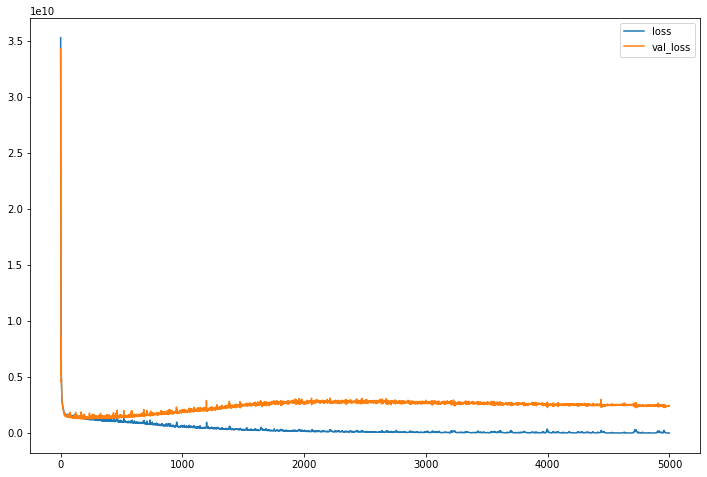

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [43]:
y_pred = model.predict(X_test)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 33809.38965691093
MSE: 2459440716.553521
RMSE: 49592.74862874129


# Regression using categorical values 

first step now is to code this categorical values to an understandable values for our models

In [328]:
f = ['MSZoning','SaleCondition']

MSZoning = preprocessing.LabelEncoder()
MSZoning.fit(['RL', 'RM', 'C (all)', 'FV', 'RH'])
data1['MSZoning'] = MSZoning.transform(data1['MSZoning'])


SaleCondition = preprocessing.LabelEncoder()
SaleCondition.fit(['Normal' ,'Abnorml' ,'Partial' ,'AdjLand' ,'Alloca' ,'Family'])
data1['SaleCondition'] = SaleCondition.transform(data1['SaleCondition'])


In [329]:
X1 = data1[f]
y = data1['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=101)

In [332]:
Linear_Regression1 = LinearRegression()
Linear_Regression1.fit(X_train, y_train)

LinearRegression()

In [333]:
y_pred = Linear_Regression1.predict(X_test)


In [334]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 49140.83099966604
MSE: 4327325362.298329
RMSE: 65782.4092162816
VarScore: 0.1167307054016149
